# Visualize training and test images for classifiers

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import glob

%matplotlib inline

In [2]:
import math

# Helper method to plot multiple images
def plot_multiple_images(images,names,gray=False,number_of_cols=6,w_factor=4,h_factor=2):
    
    number_of_images=len(images)

    number_of_rows=math.ceil(number_of_images*1.0/number_of_cols)

    
    
    fig_width=w_factor*number_of_cols  
    fig_height=h_factor*number_of_rows
    
    if number_of_rows > 5 :
        _dpi = number_of_rows * 5
    else :
        _dpi = 30
    
    #fig=plt.figure(figsize=(fig_width, fig_height),dpi=_dpi, facecolor='w', edgecolor='w')
    fig=plt.figure(figsize=(fig_width, fig_height), facecolor='w', edgecolor='w')
    
    im_number=0
    for im, name in zip(images,names):
        im_number+=1
        plt.subplot(number_of_rows,number_of_cols,im_number)
        plt.title(name)
        if gray :
            plt.imshow(im,cmap='gray')
        else :
            plt.imshow(im)

In [ ]:
car_images=[]
non_car_images=[]

In [5]:
car_images_paths = glob.glob('train_test_images/vehicles_smallset/cars*/*.jpeg')
no_car_images_paths = glob.glob('train_test_images/non-vehicles_smallset/notcars*/*.jpeg')

In [46]:
im_path=np.random.choice(car_images_paths)
im=mpimg.imread(im_path)
print(im.shape)
print(im.dtype)

(64, 64, 3)
uint8


In [47]:
im_path=np.random.choice(no_car_images_paths)
im=mpimg.imread(im_path)
print(im.shape)
print(im.dtype)

(64, 64, 3)
uint8


In [6]:
sample_car_images=[]
sample_car_files=[]
for i in range(15):
    im_path=np.random.choice(car_images_paths)
    im=mpimg.imread(im_path)
    file_name=im_path.split('\\')[2]
    sample_car_images.append(im)
    sample_car_files.append(file_name)

In [7]:
sample_non_car_images=[]
sample_non_car_files=[]
for i in range(15):
    im_path=np.random.choice(no_car_images_paths)
    im=mpimg.imread(im_path)
    file_name=im_path.split('\\')[2]
    sample_non_car_images.append(im)
    sample_non_car_files.append(file_name)

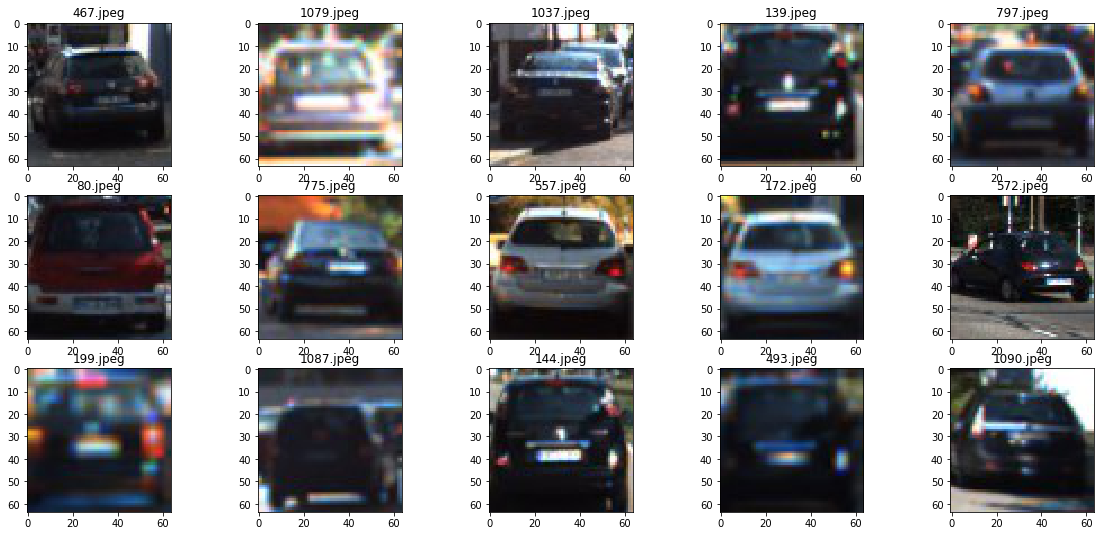

In [107]:
plot_multiple_images(sample_car_images,sample_car_files,gray=False,number_of_cols=5,w_factor=4,h_factor=3)

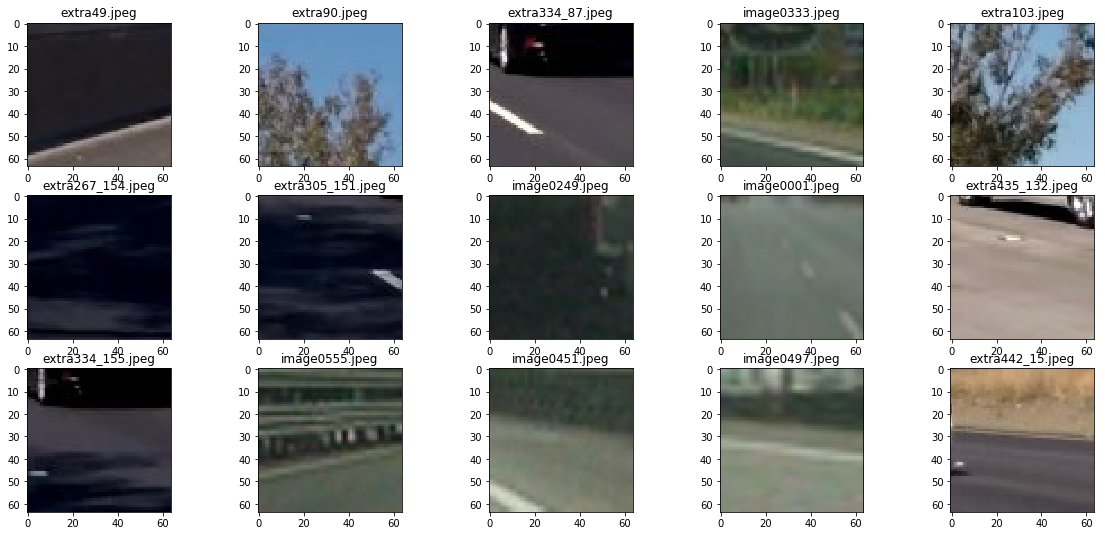

In [105]:
plot_multiple_images(sample_non_car_images,sample_non_car_files,gray=False,number_of_cols=5,w_factor=4,h_factor=3)

In [115]:
# save sample files for consistent analysis

In [3]:
import pickle

In [8]:
file=open('sample_cars.pkl','wb')
pickle.dump((sample_car_images,sample_car_files),file)

In [9]:
file=open('sample_cars.pkl','rb')
sample_car_images,sample_car_files=pickle.load(file)

In [10]:
file=open('sample_non_cars.pkl','wb')
pickle.dump((sample_non_car_images,sample_non_car_files),file)

In [11]:
file=open('sample_non_cars.pkl','rb')
sample_non_car_images,sample_non_car_files=pickle.load(file)

# Extract Features from images

## Pixel values or bin spatial

In [12]:
# Just get pixel values by reasizing image to new 
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

## bin_spatial for Cars

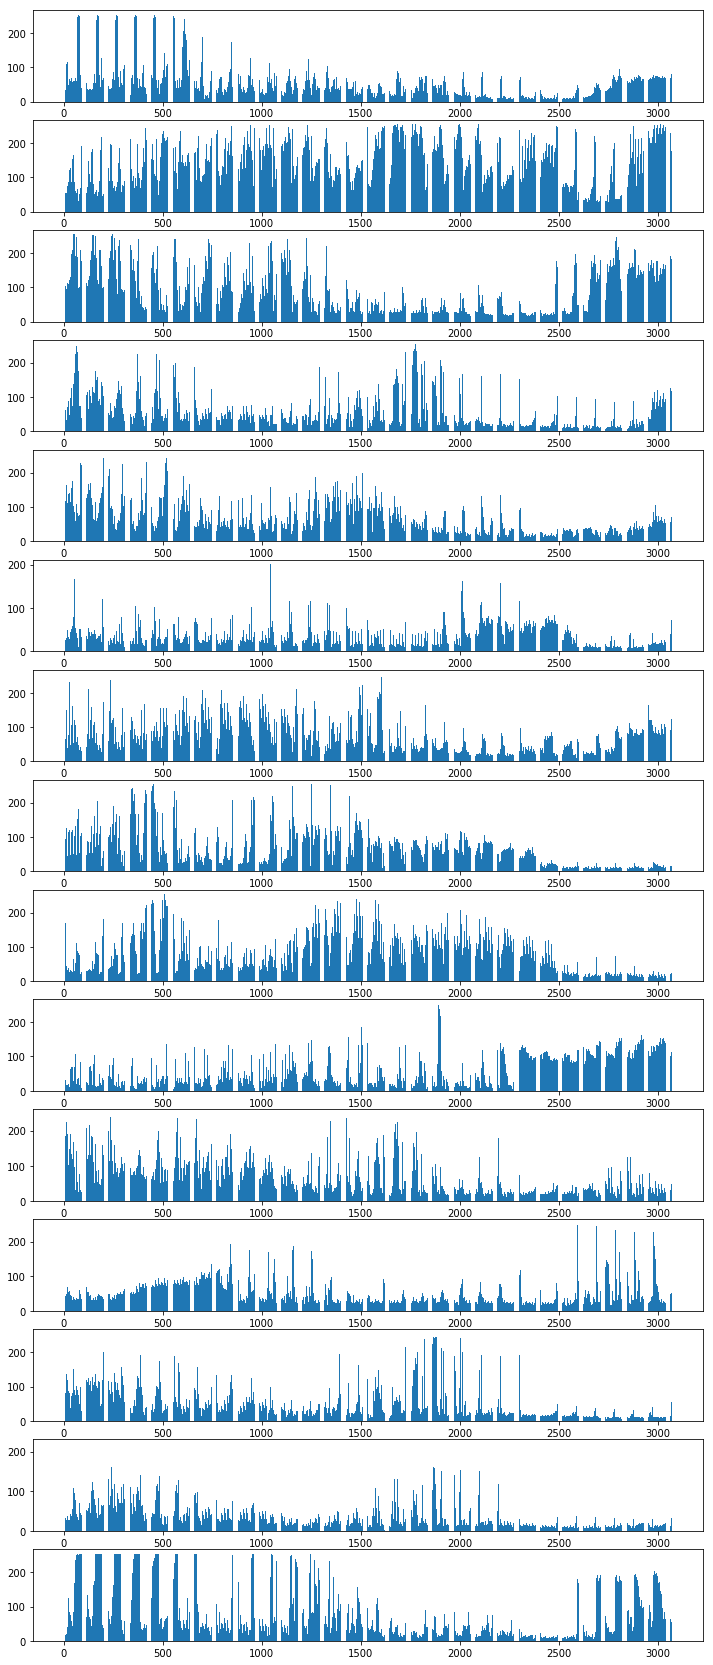

In [137]:
num_ims=len(sample_car_images)
plt.figure(figsize=(12,num_ims*2))
counter=0
for im in sample_car_images :
    counter+=1
    spatial_size=(32,32)
    bin_feature = bin_spatial(im,size=spatial_size)    
    plt.subplot(num_ims,1,counter)
    plt.bar(range(len(bin_feature)),bin_feature)

## bin_spatial for non cars

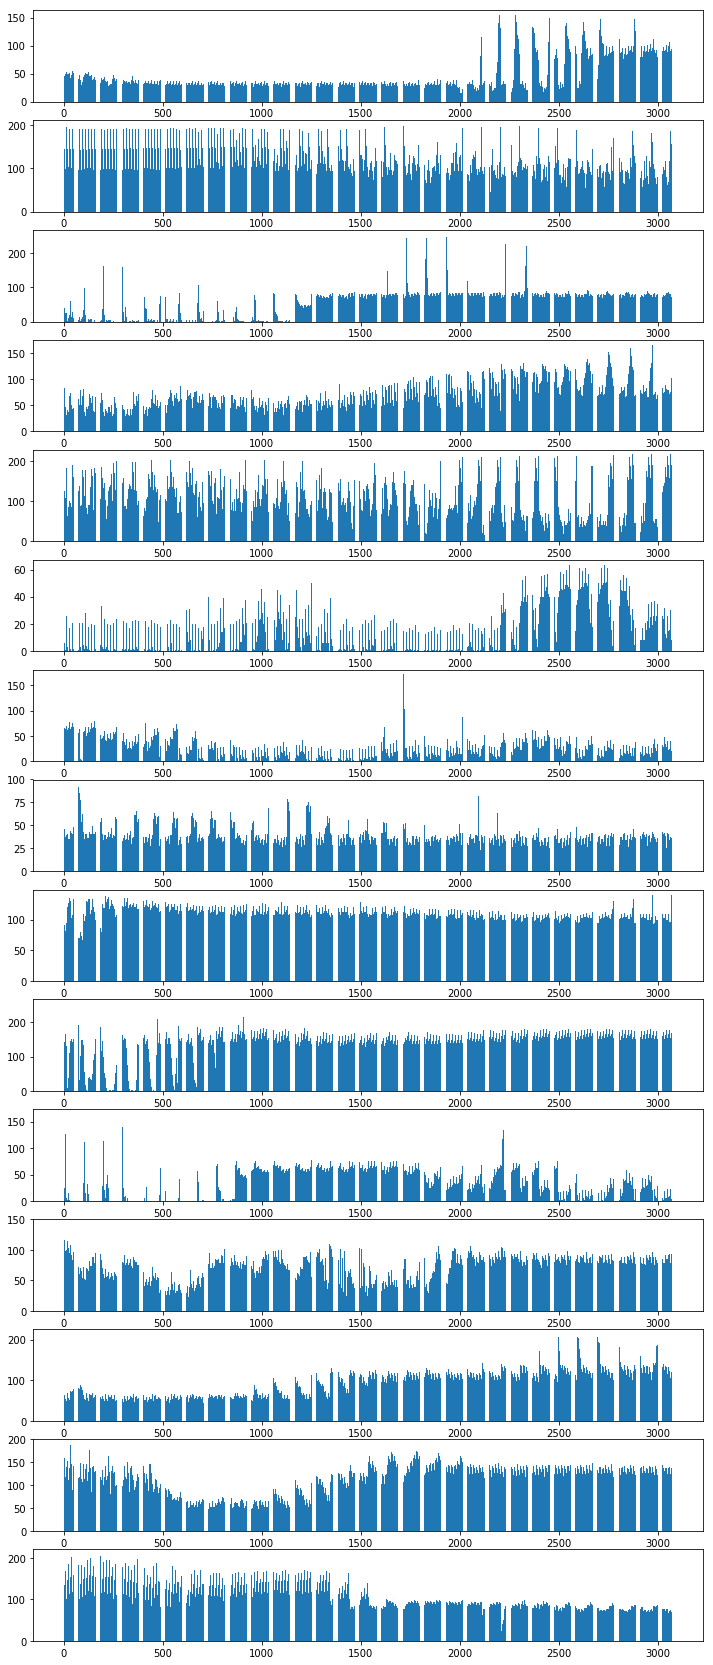

In [138]:
num_ims=len(sample_non_car_images)
plt.figure(figsize=(12,num_ims*2))
counter=0
for im in sample_non_car_images :
    counter+=1
    spatial_size=(32,32)
    bin_feature = bin_spatial(im,size=spatial_size)    
    plt.subplot(num_ims,1,counter)
    plt.bar(range(len(bin_feature)),bin_feature)

### Color historgram

In [126]:
def color_hist(img, nbins=32, bins_range=(0, 256)):
   
    hist1 = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    hist2 = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    hist3 = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    
    color_hist_features = np.concatenate((hist1[0], hist2[0], hist3[0]))
    
    return color_hist_features

## Color histogram for car images

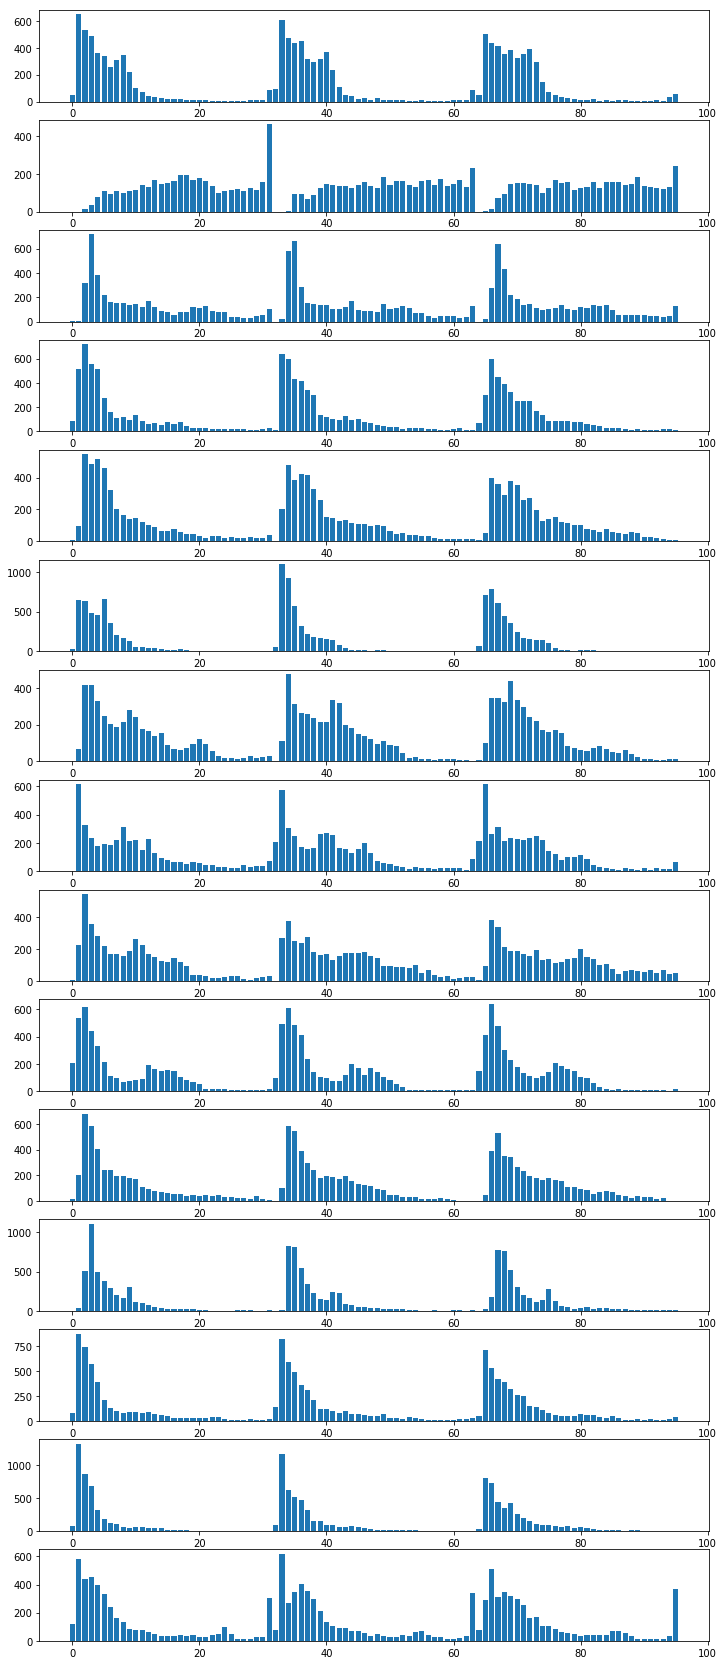

In [139]:
num_ims=len(sample_car_images)
plt.figure(figsize=(12,num_ims*2))
counter=0
for im in sample_car_images :
    counter+=1
    spatial_size=(32,32)
    color_hist_feature = color_hist(im,nbins=32,bins_range=(0, 256)) 
    plt.subplot(num_ims,1,counter)
    plt.bar(range(len(color_hist_feature)),color_hist_feature)

## Color histogram for non car images

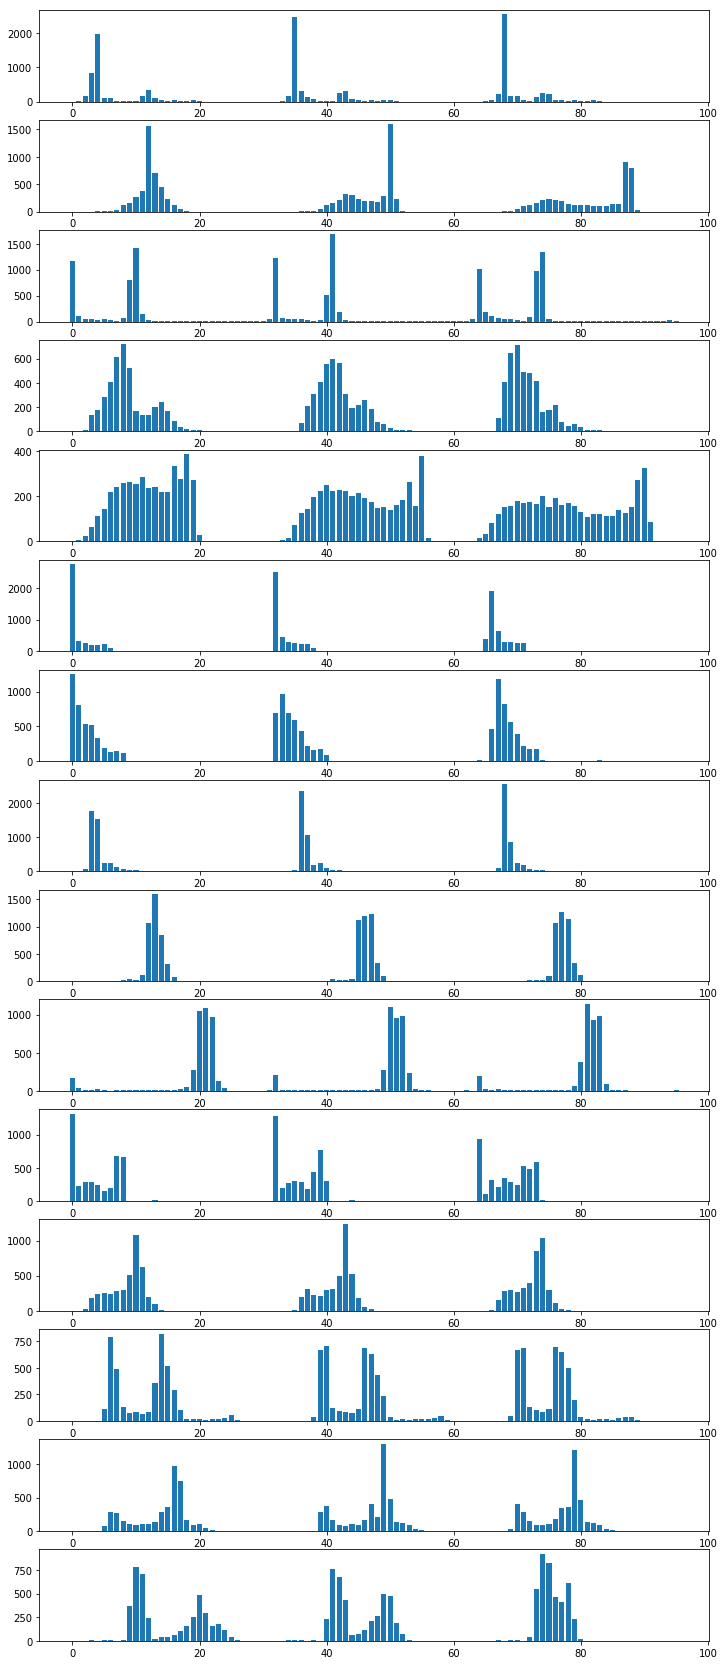

In [140]:
num_ims=len(sample_non_car_images)
plt.figure(figsize=(12,num_ims*2))
counter=0
for im in sample_non_car_images :
    counter+=1
    spatial_size=(32,32)
    color_hist_feature = color_hist(im,nbins=32,bins_range=(0, 256)) 
    plt.subplot(num_ims,1,counter)
    plt.bar(range(len(color_hist_feature)),color_hist_feature)

## Hog features for different color spaces and channels

In [13]:
def convert_color(img, cspace='HSV'):
    
    if cspace != 'RGB':
        if cspace == 'HSV':
            converted_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif cspace == 'LUV':
            converted_img = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif cspace == 'HLS':
            converted_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif cspace == 'YUV':
            converted_img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif cspace == 'YCrCb':
            converted_img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
        else :
            raise('color space ', cspace , ' not supported')
    else: 
        converted_img = np.copy(image)      
    
    return converted_img
    

In [14]:
# http://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=hessian#skimage.feature.hog
from skimage.feature import hog

def get_hog_features(img, orient=9, pix_per_cell=8, cell_per_block=2, 
                        vis=False, feature_vec=True):
    hog_image=None
    
    if vis : 
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                      cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                                      transform_sqrt=True, 
                                      visualise=True, feature_vector=feature_vec) 
    else : 
        features= hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                      cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                                      transform_sqrt=True, 
                                      visualise=False, feature_vector=feature_vec)   

    return features, hog_image


## Hog for R channel for Cars

In [146]:
hog_features=[]
hog_images=[]
for im in sample_car_images: 
    spatial_size=(32,32)
    hog_f,hog_im = get_hog_features(im[:,:,0],vis=True, feature_vec=True)    
    hog_features.append(hog_f)
    hog_images.append(hog_im)

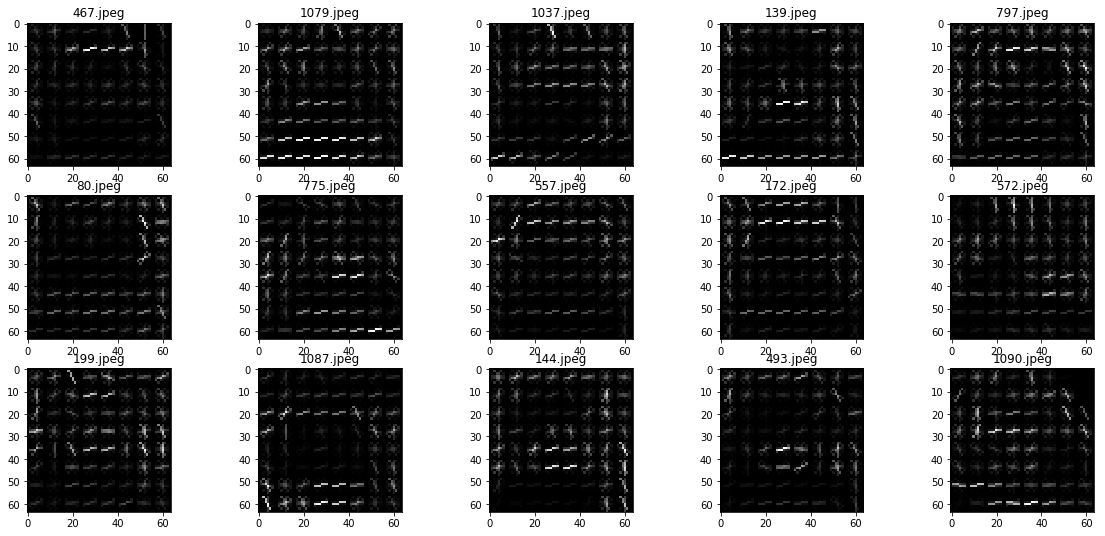

In [147]:
plot_multiple_images(hog_images,car_files,gray=True,number_of_cols=5,w_factor=4,h_factor=3)

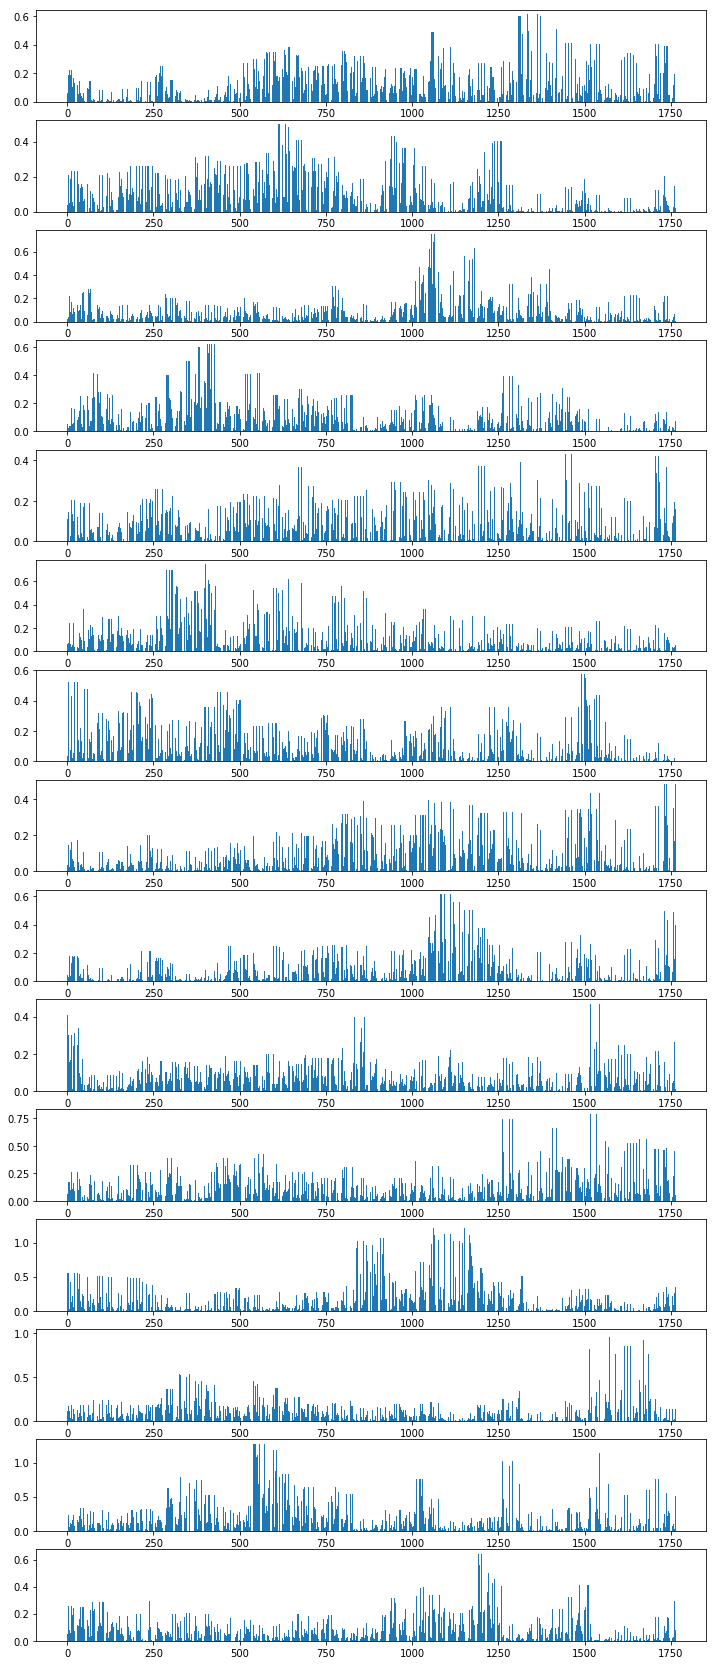

In [144]:
plt.figure(figsize=(12,num_ims*2))
counter=0
for feature in hog_features :
    counter+=1
    plt.subplot(num_ims,1,counter)
    plt.bar(range(len(feature)),feature)

## Hog for R channel for non cars

In [148]:
hog_features=[]
hog_images=[]
for im in sample_non_car_images: 
    spatial_size=(32,32)
    hog_f,hog_im = get_hog_features(im[:,:,1],vis=True, feature_vec=True)    
    hog_features.append(hog_f)
    hog_images.append(hog_im)

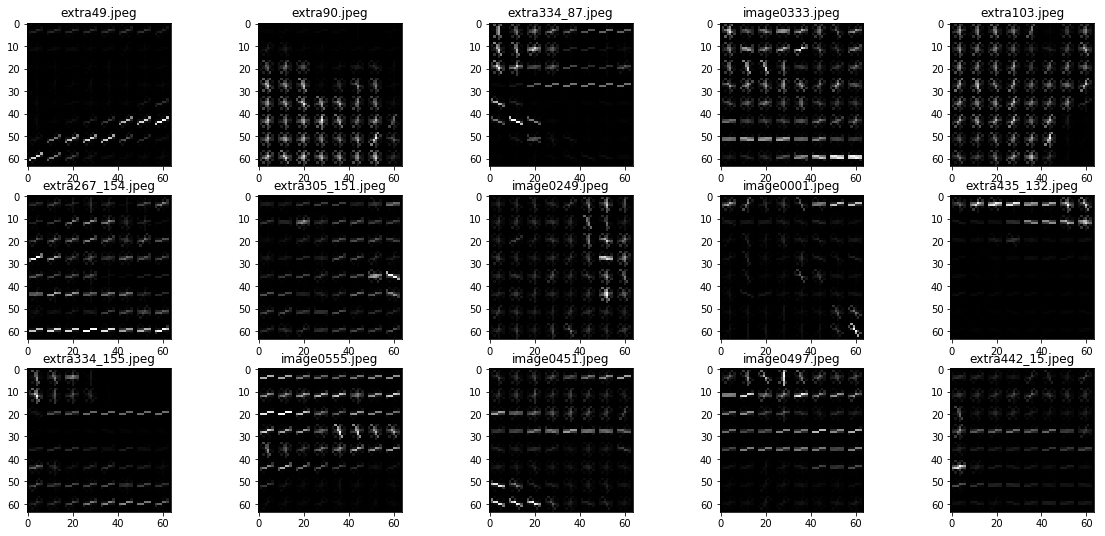

In [149]:
plot_multiple_images(hog_images,no_car_files,gray=True,number_of_cols=5,w_factor=4,h_factor=3)

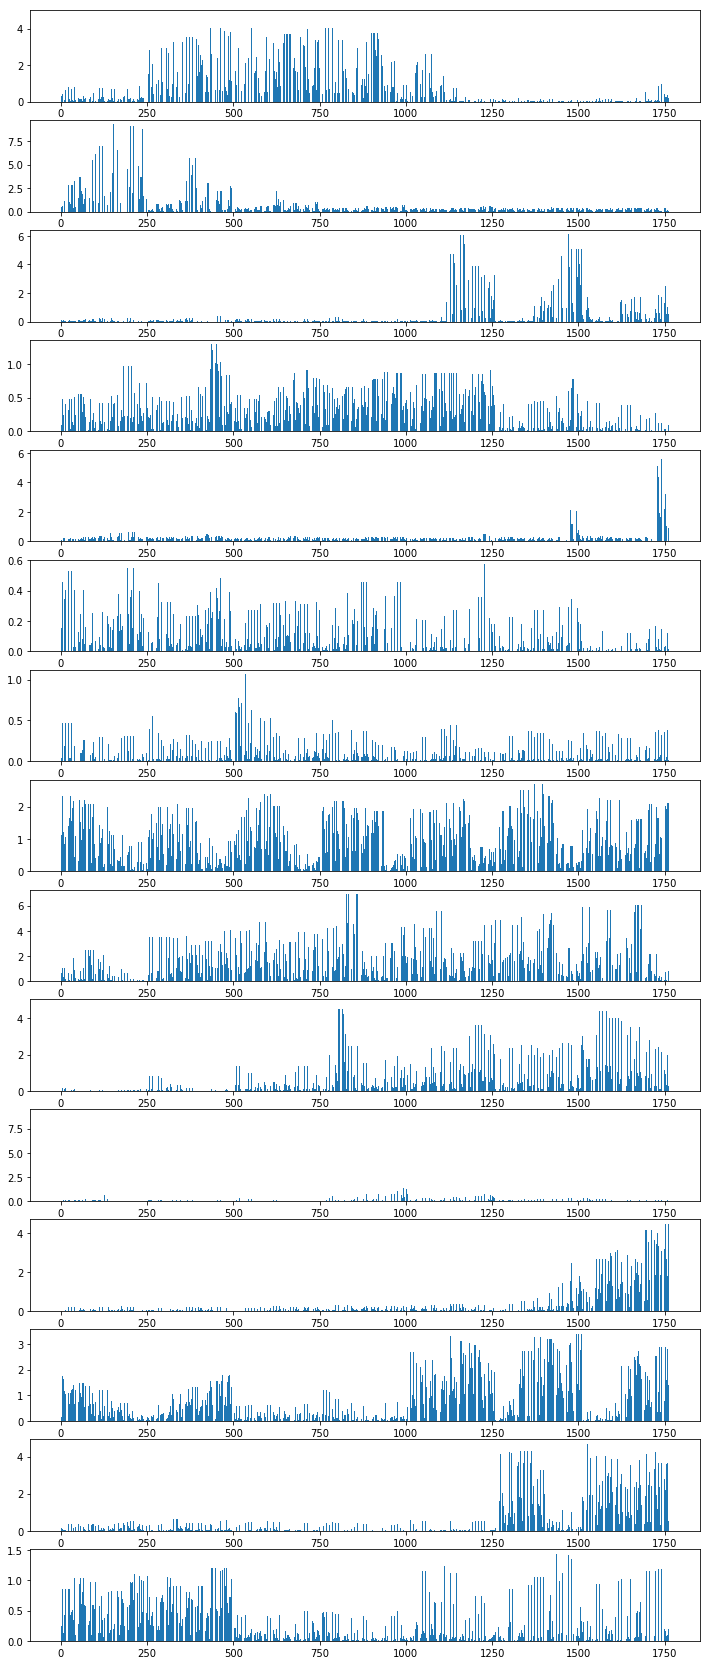

In [150]:
num_ims=len(sample_car_images)
plt.figure(figsize=(12,num_ims*2))
counter=0
for feature in hog_features :
    counter+=1
    plt.subplot(num_ims,1,counter)
    plt.bar(range(len(feature)),feature)

## Hog S channel for cars

In [152]:
hog_features=[]
hog_images=[]
for im in sample_car_images: 
    spatial_size=(32,32)
    im_HLS=convert_color(im,cspace='HLS')
    hog_f,hog_im = get_hog_features(im_HLS[:,:,2],vis=True, feature_vec=True)    
    hog_features.append(hog_f)
    hog_images.append(hog_im)

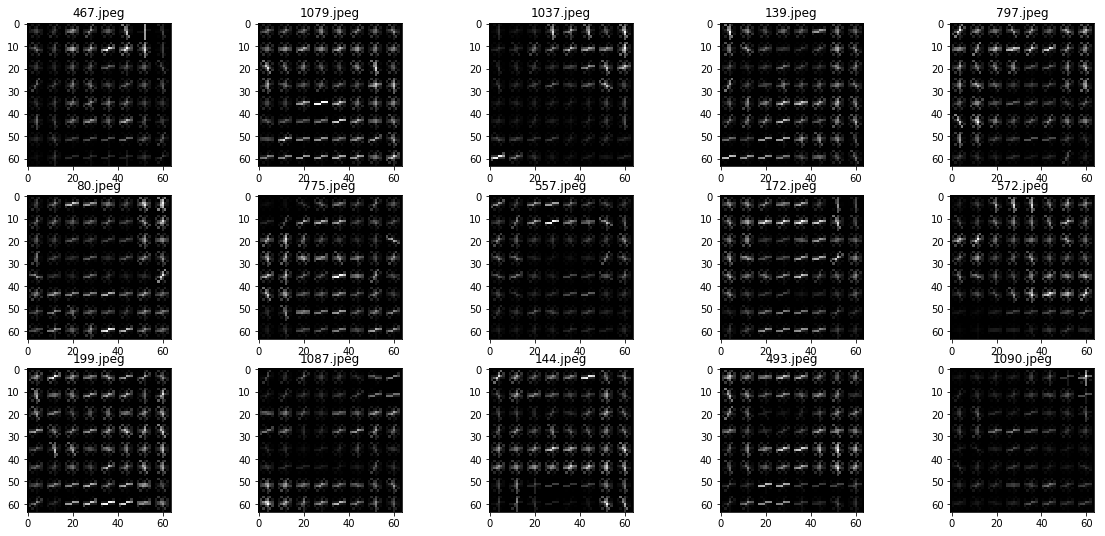

In [153]:
plot_multiple_images(hog_images,car_files,gray=True,number_of_cols=5,w_factor=4,h_factor=3)

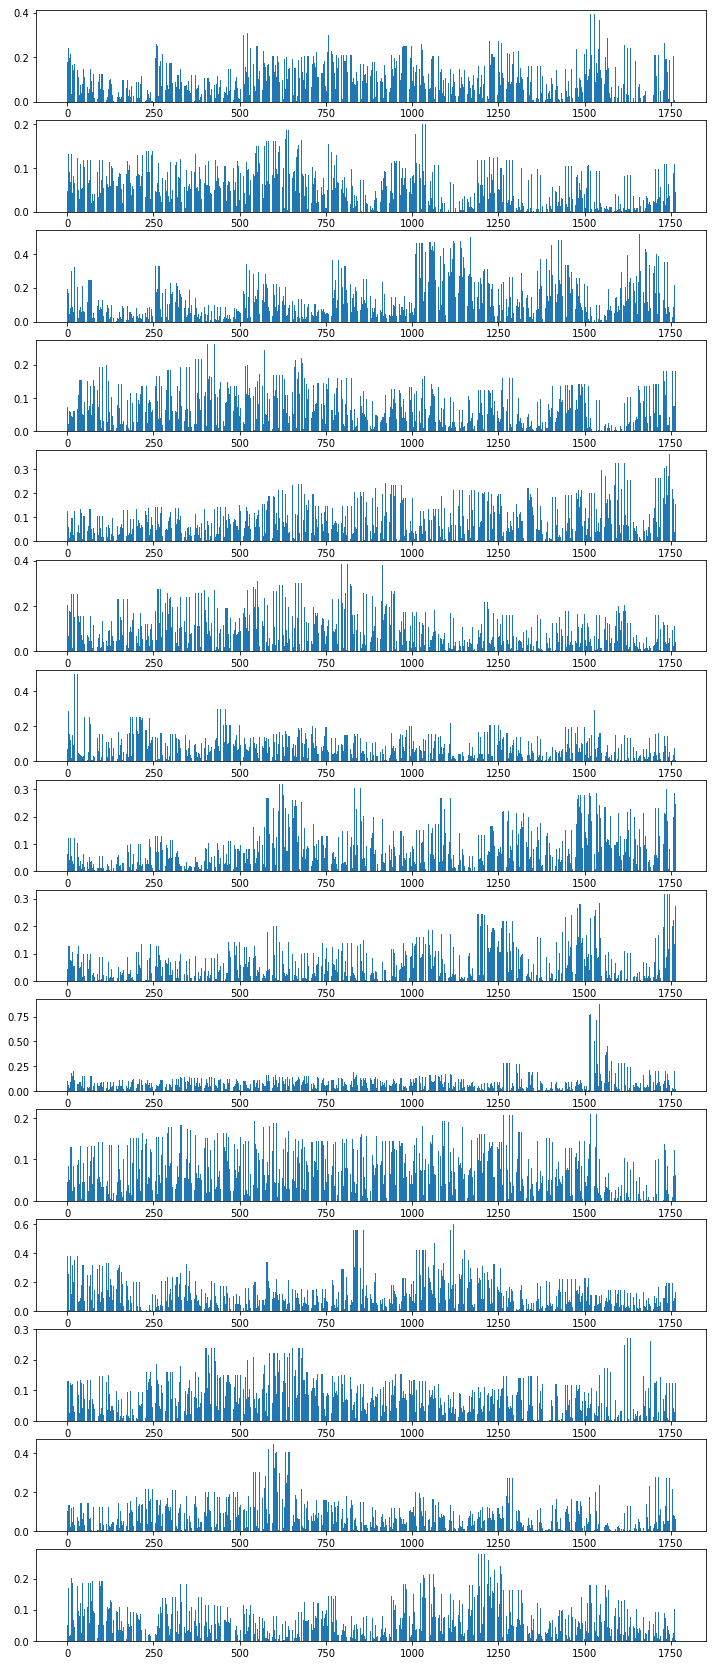

In [154]:
num_ims=len(sample_non_car_images)
plt.figure(figsize=(12,num_ims*2))
counter=0
for feature in hog_features :
    counter+=1
    plt.subplot(num_ims,1,counter)
    plt.bar(range(len(feature)),feature)

## HOG for S channel for non cars

In [155]:
hog_features=[]
hog_images=[]
for im in sample_non_car_images: 
    spatial_size=(32,32)
    im_HLS=convert_color(im,cspace='HLS')
    hog_f,hog_im = get_hog_features(im_HLS[:,:,2],vis=True, feature_vec=True)    
    hog_features.append(hog_f)
    hog_images.append(hog_im)

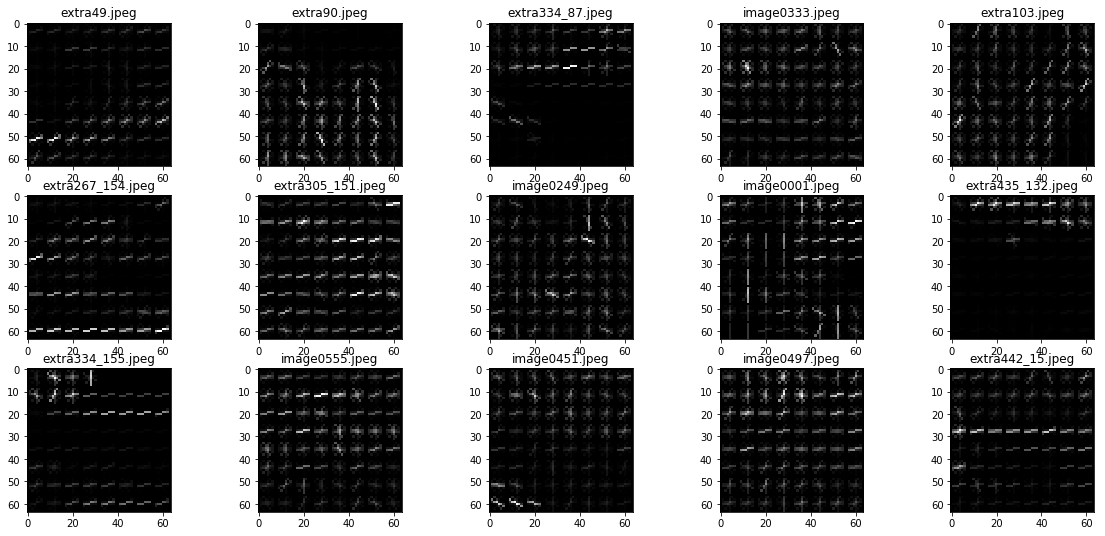

In [157]:
plot_multiple_images(hog_images,no_car_files,gray=True,number_of_cols=5,w_factor=4,h_factor=3)

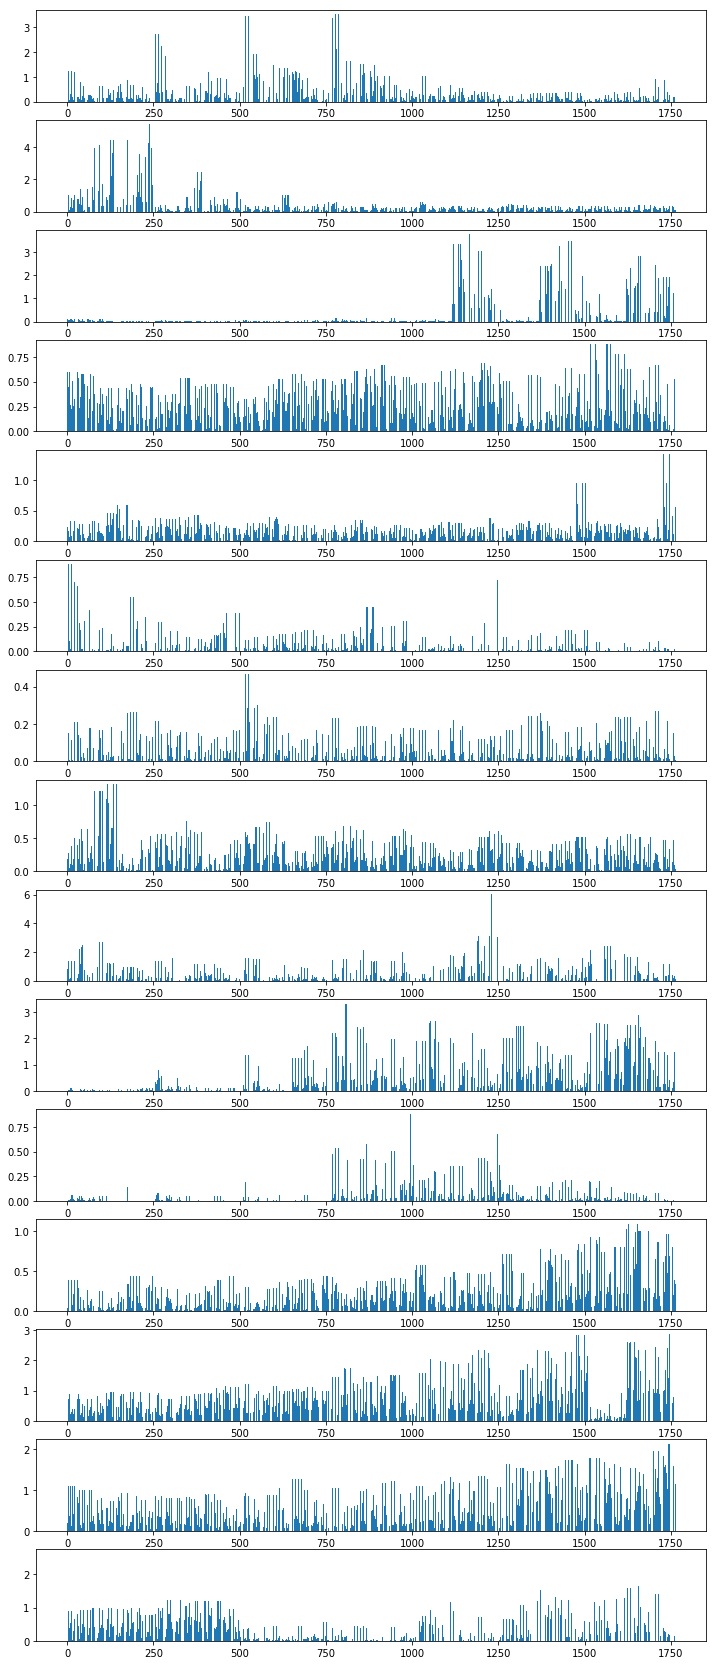

In [158]:
num_ims=len(sample_non_car_images)
plt.figure(figsize=(12,num_ims*2))
counter=0
for feature in hog_features :
    counter+=1
    plt.subplot(num_ims,1,counter)
    plt.bar(range(len(feature)),feature)

## Hog for H channle for cars

In [159]:
hog_features=[]
hog_images=[]
for im in sample_car_images: 
    spatial_size=(32,32)
    im_HLS=convert_color(im,cspace='HLS')
    hog_f,hog_im = get_hog_features(im_HLS[:,:,0],vis=True, feature_vec=True)    
    hog_features.append(hog_f)
    hog_images.append(hog_im)

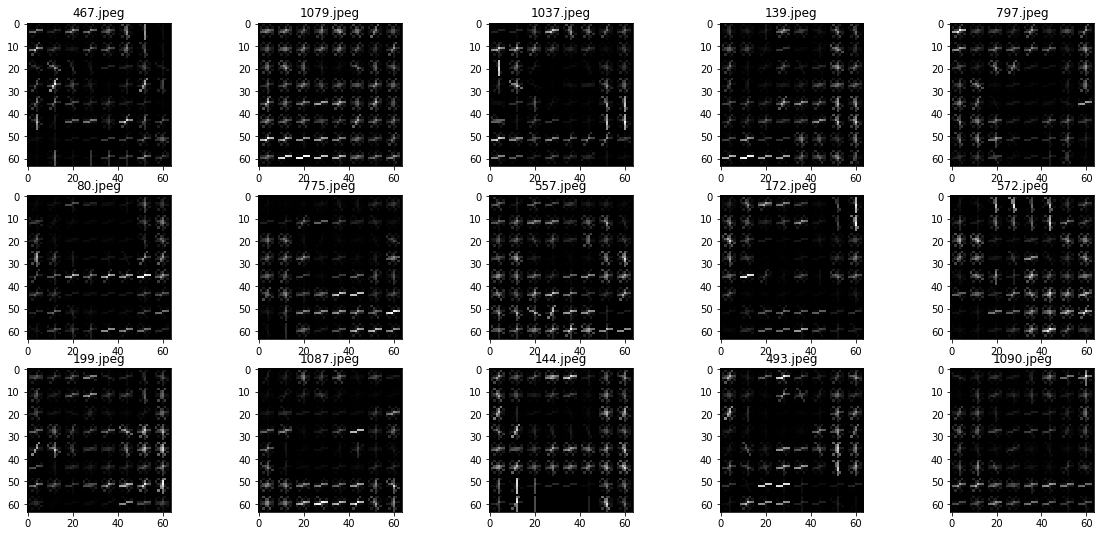

In [160]:
plot_multiple_images(hog_images,car_files,gray=True,number_of_cols=5,w_factor=4,h_factor=3)

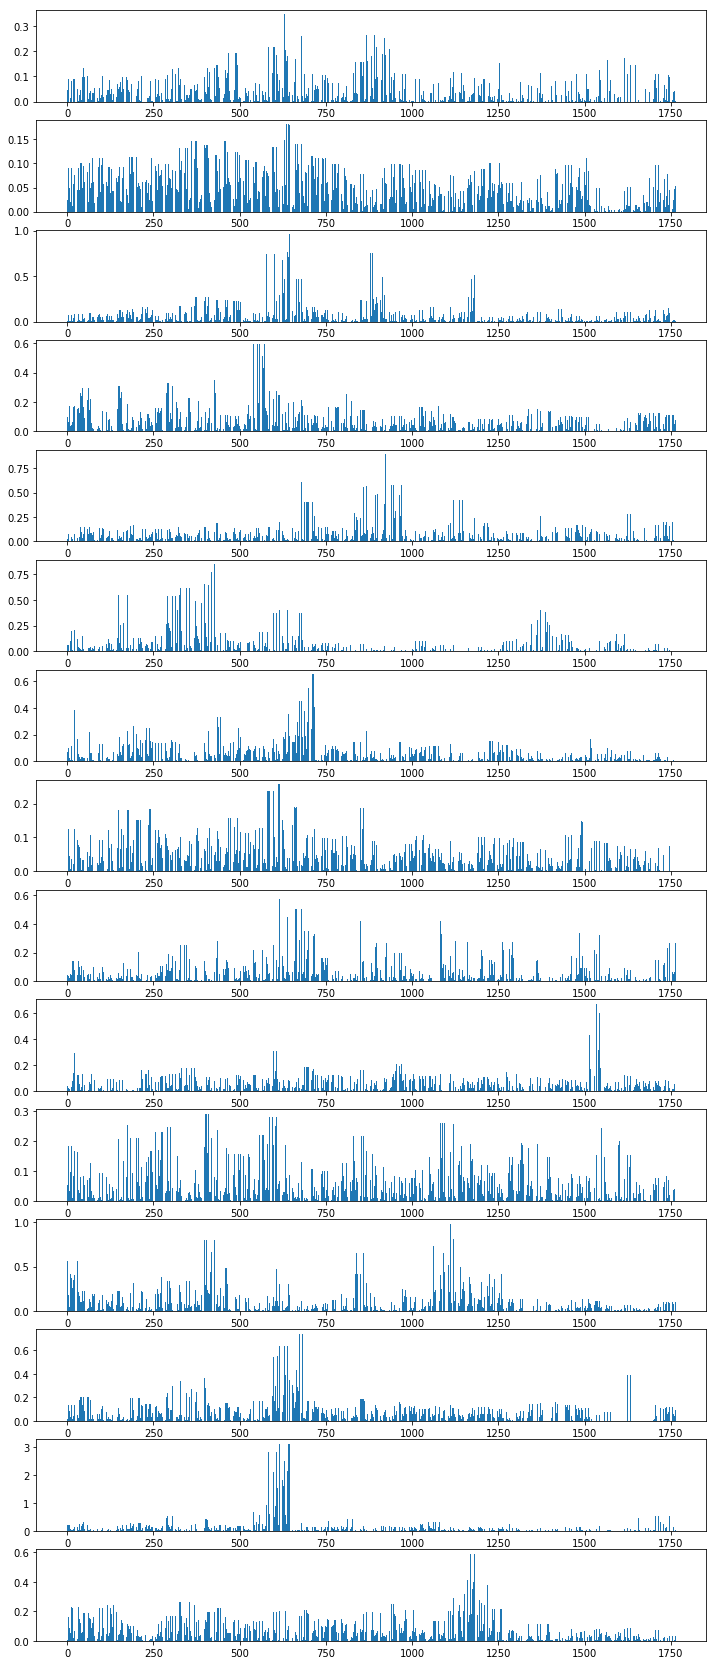

In [161]:
num_ims=len(sample_car_images)
plt.figure(figsize=(12,num_ims*2))
counter=0
for feature in hog_features :
    counter+=1
    plt.subplot(num_ims,1,counter)
    plt.bar(range(len(feature)),feature)

## Hog for H channel for  non cars

In [162]:
hog_features=[]
hog_images=[]
for im in sample_non_car_images: 
    spatial_size=(32,32)
    im_HLS=convert_color(im,cspace='HLS')
    hog_f,hog_im = get_hog_features(im_HLS[:,:,0],vis=True, feature_vec=True)    
    hog_features.append(hog_f)
    hog_images.append(hog_im)

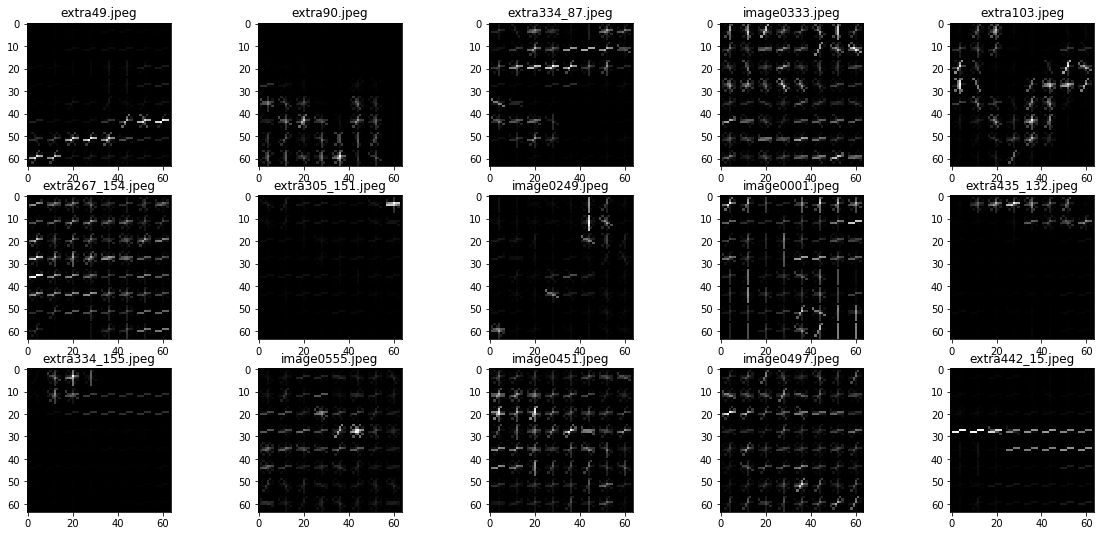

In [163]:
plot_multiple_images(hog_images,no_car_files,gray=True,number_of_cols=5,w_factor=4,h_factor=3)

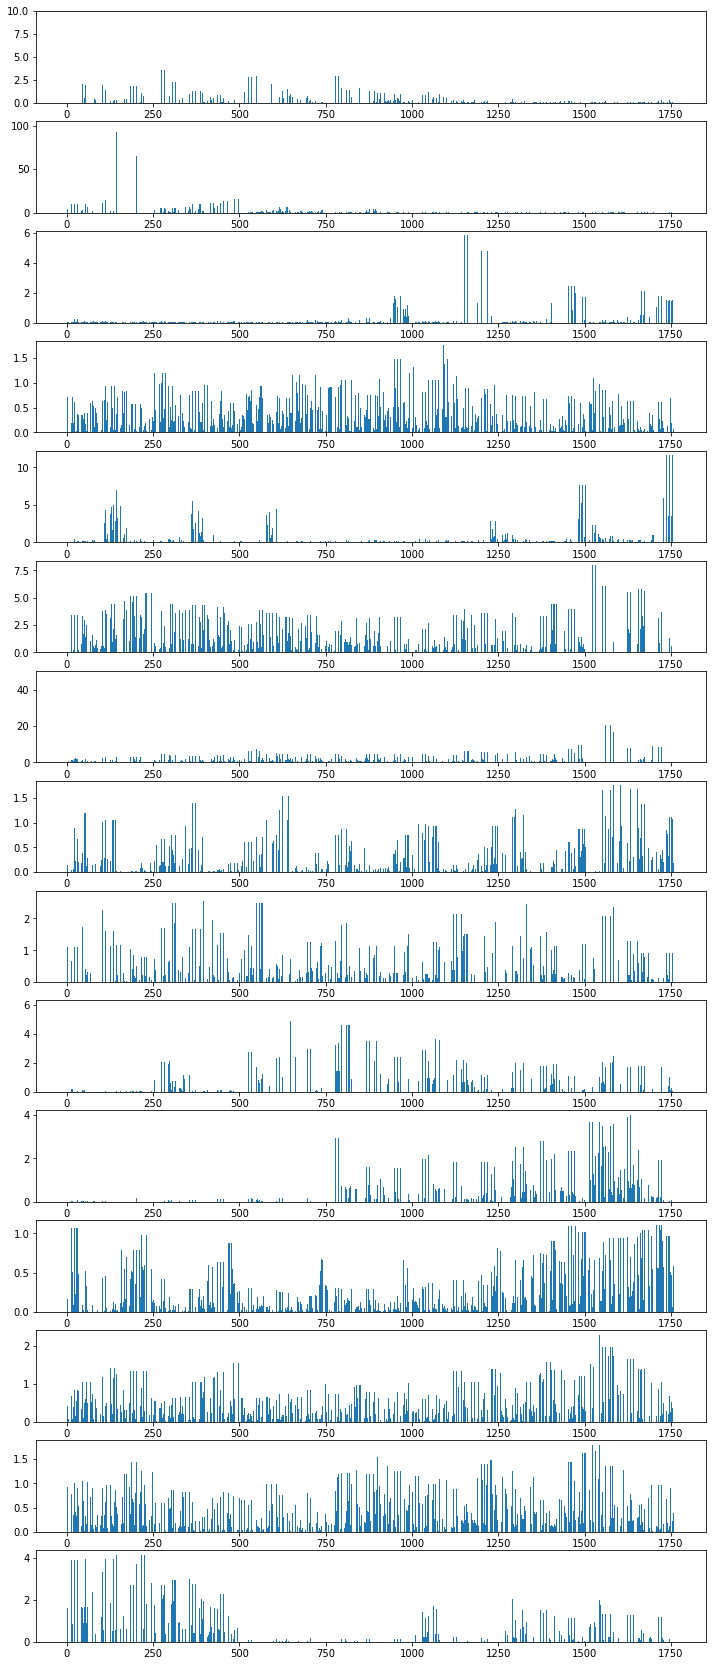

In [164]:
num_ims=len(sample_non_car_images)
plt.figure(figsize=(12,num_ims*2))
counter=0
for feature in hog_features :
    counter+=1
    plt.subplot(num_ims,1,counter)
    plt.bar(range(len(feature)),feature)

## Hog for L channel of car images

In [165]:
hog_features=[]
hog_images=[]
for im in sample_car_images: 
    spatial_size=(32,32)
    im_HLS=convert_color(im,cspace='HLS')
    hog_f,hog_im = get_hog_features(im_HLS[:,:,1],vis=True, feature_vec=True)    
    hog_features.append(hog_f)
    hog_images.append(hog_im)

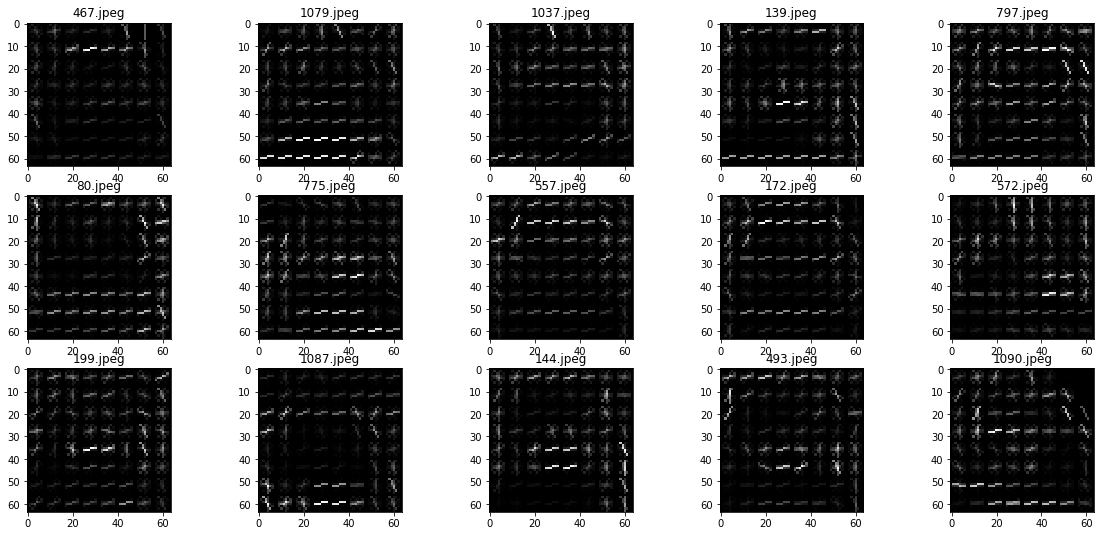

In [166]:
plot_multiple_images(hog_images,car_files,gray=True,number_of_cols=5,w_factor=4,h_factor=3)

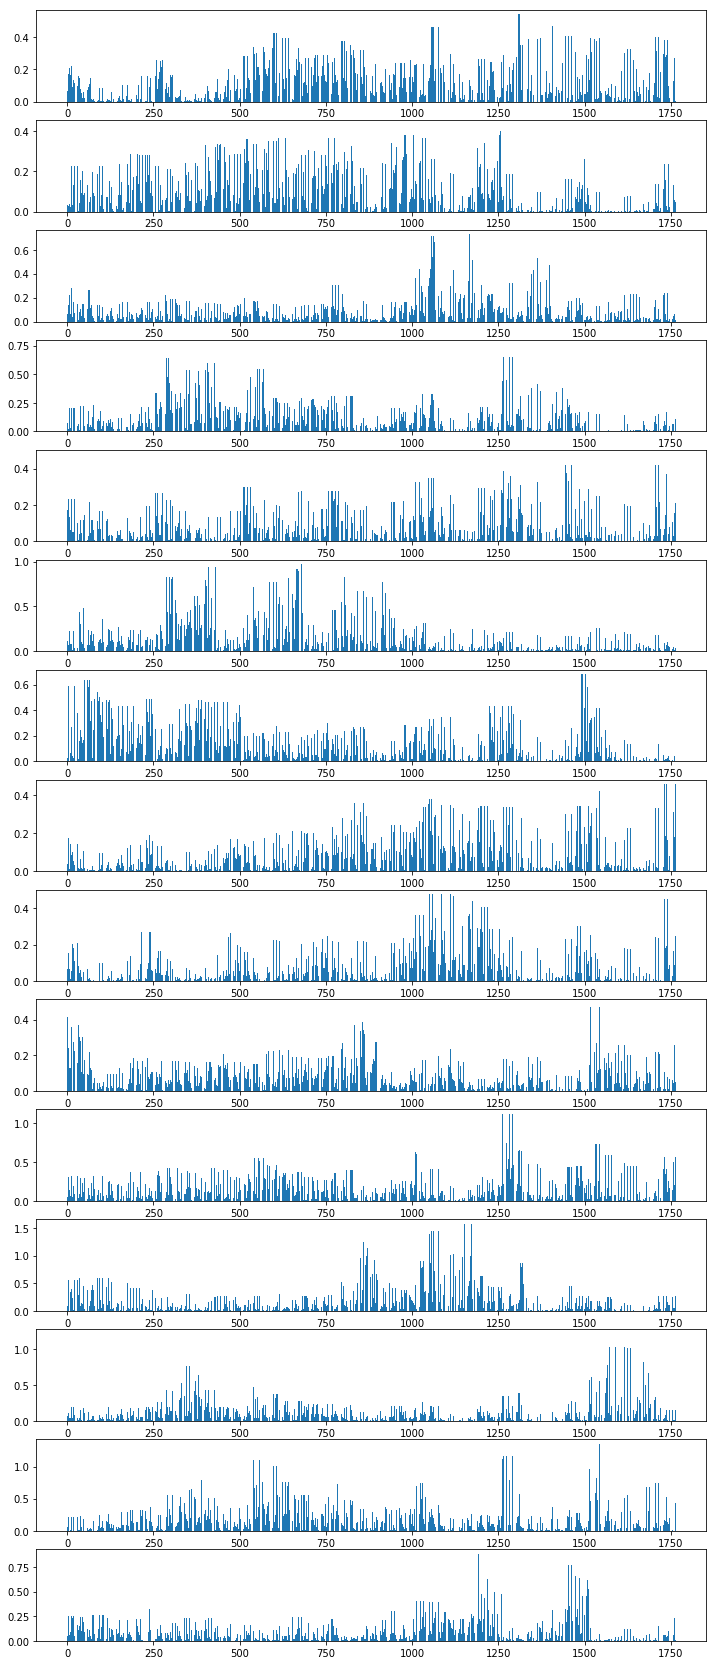

In [167]:
num_ims=len(sample_car_images)
plt.figure(figsize=(12,num_ims*2))
counter=0
for feature in hog_features :
    counter+=1
    plt.subplot(num_ims,1,counter)
    plt.bar(range(len(feature)),feature)

## Hog of  L channel for non cars

In [168]:
hog_features=[]
hog_images=[]
for im in sample_non_car_images: 
    spatial_size=(32,32)
    im_HLS=convert_color(im,cspace='HLS')
    hog_f,hog_im = get_hog_features(im_HLS[:,:,1],vis=True, feature_vec=True)    
    hog_features.append(hog_f)
    hog_images.append(hog_im)

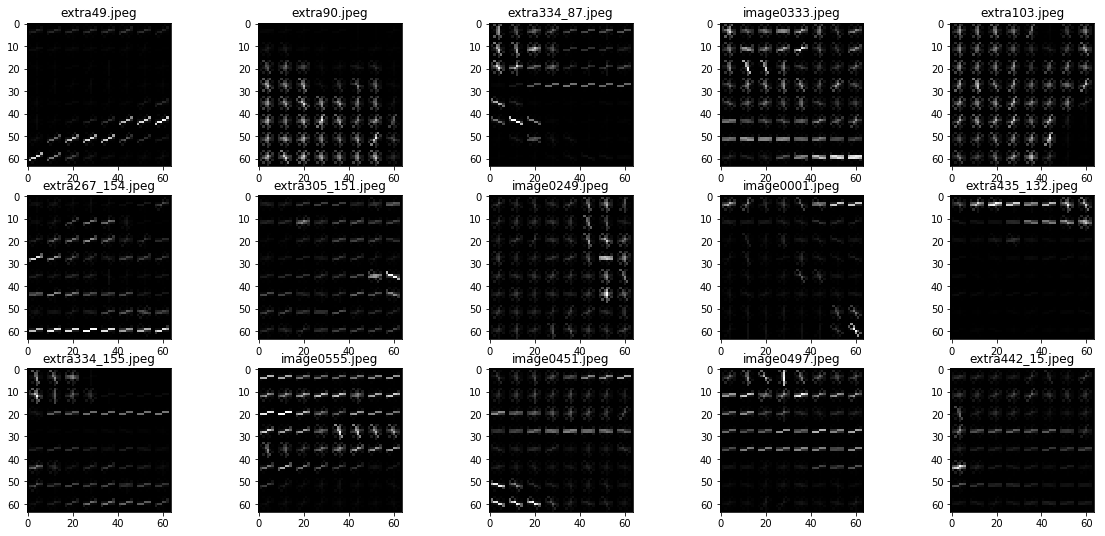

In [169]:
plot_multiple_images(hog_images,no_car_files,gray=True,number_of_cols=5,w_factor=4,h_factor=3)

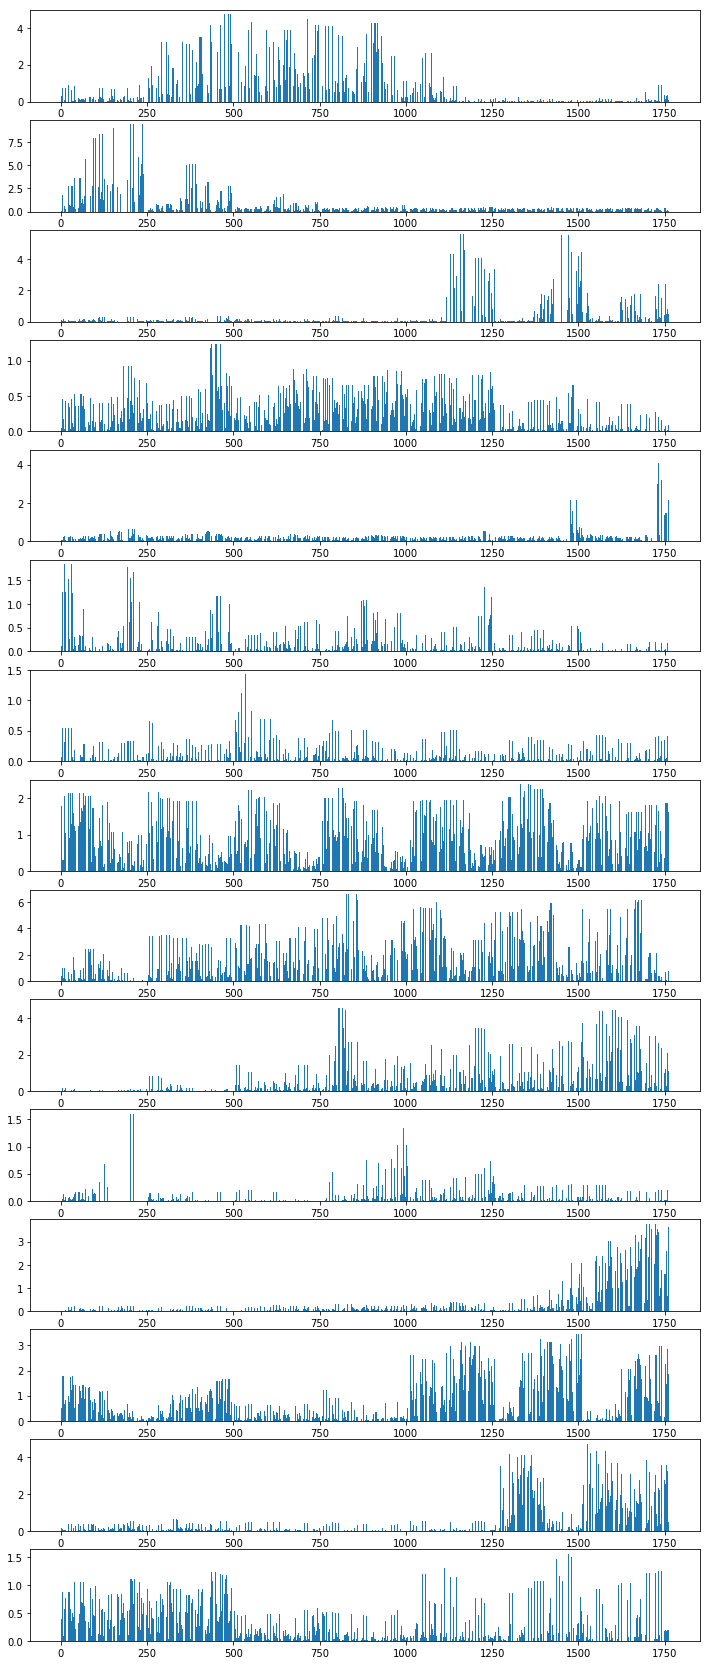

In [170]:
num_ims=len(sample_non_car_images)
plt.figure(figsize=(12,num_ims*2))
counter=0
for feature in hog_features :
    counter+=1
    plt.subplot(num_ims,1,counter)
    plt.bar(range(len(feature)),feature)

## Hog for Y channel for cars

In [15]:
hog_features=[]
hog_images=[]
for im in sample_car_images: 
    spatial_size=(32,32)
    im_HLS=convert_color(im,cspace='YCrCb')
    hog_f,hog_im = get_hog_features(im_HLS[:,:,0],vis=True, feature_vec=True)    
    hog_features.append(hog_f)
    hog_images.append(hog_im)

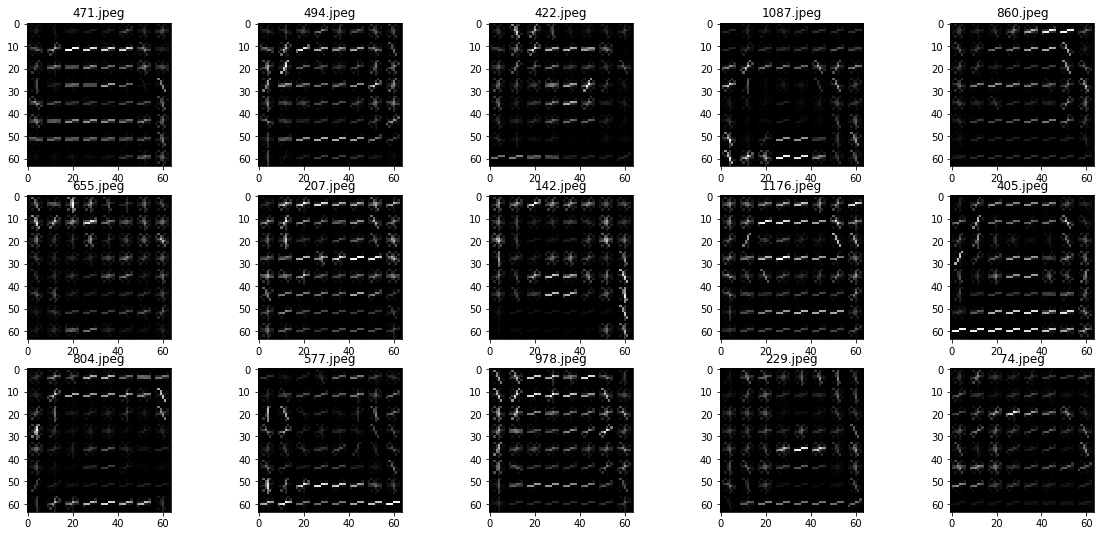

In [17]:
plot_multiple_images(hog_images,sample_car_files,gray=True,number_of_cols=5,w_factor=4,h_factor=3)

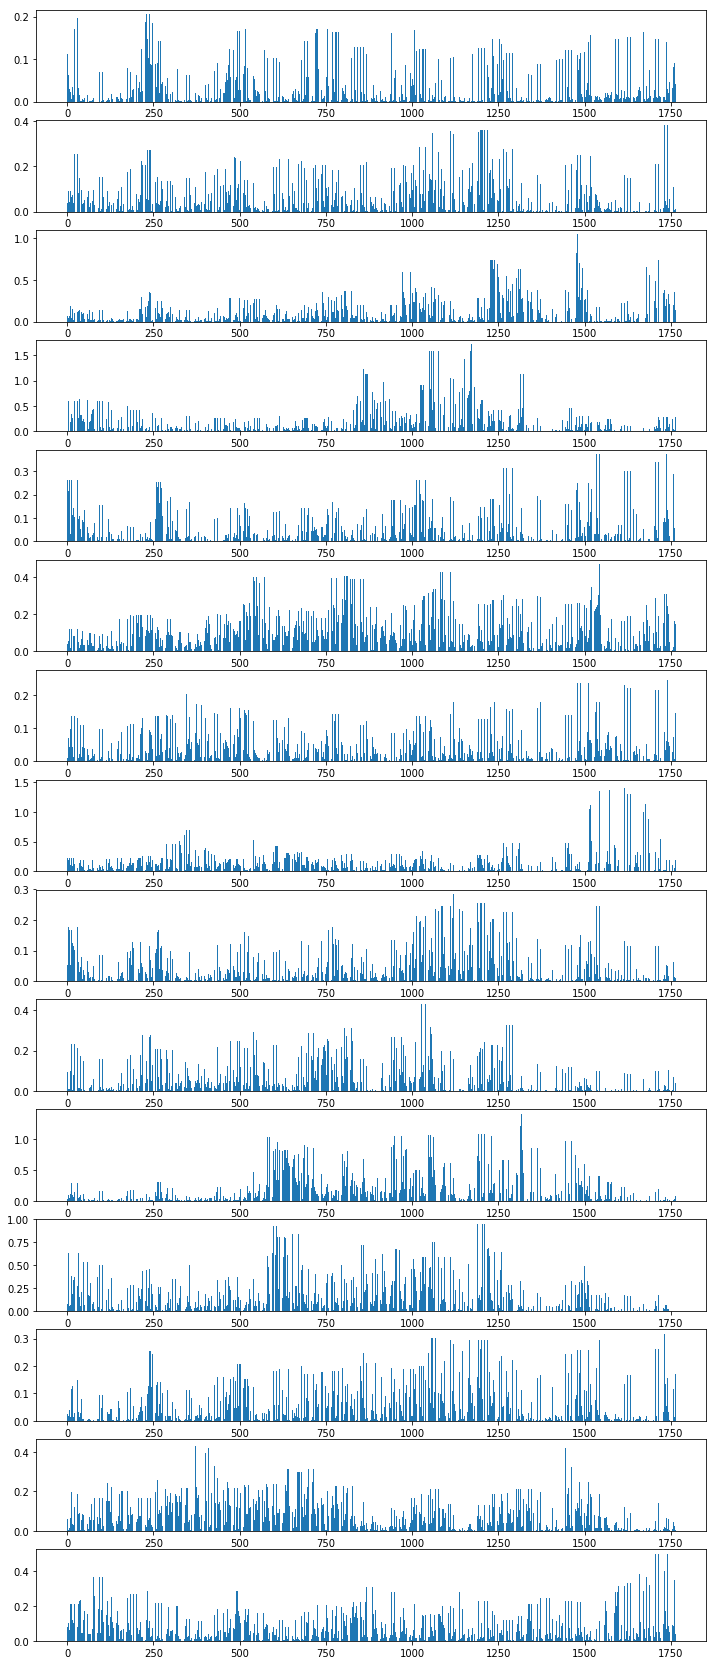

In [18]:
num_ims=len(sample_car_images)
plt.figure(figsize=(12,num_ims*2))
counter=0
for feature in hog_features :
    counter+=1
    plt.subplot(num_ims,1,counter)
    plt.bar(range(len(feature)),feature)

## Hog Y channel no cars

In [19]:
hog_features=[]
hog_images=[]
for im in sample_non_car_images: 
    spatial_size=(32,32)
    im_HLS=convert_color(im,cspace='YCrCb')
    hog_f,hog_im = get_hog_features(im_HLS[:,:,0],vis=True, feature_vec=True)    
    hog_features.append(hog_f)
    hog_images.append(hog_im)

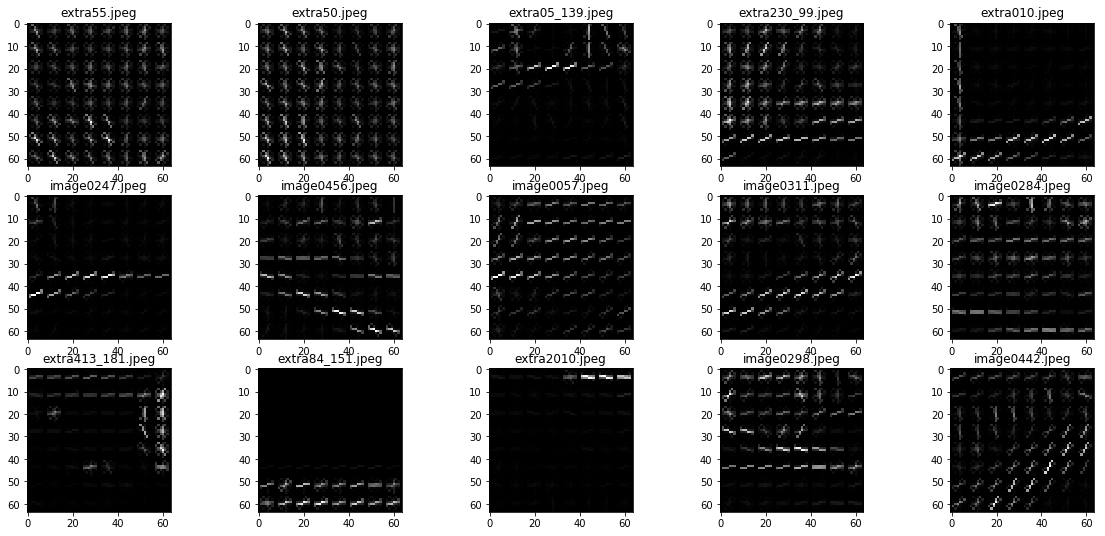

In [21]:
plot_multiple_images(hog_images,sample_non_car_files,gray=True,number_of_cols=5,w_factor=4,h_factor=3)

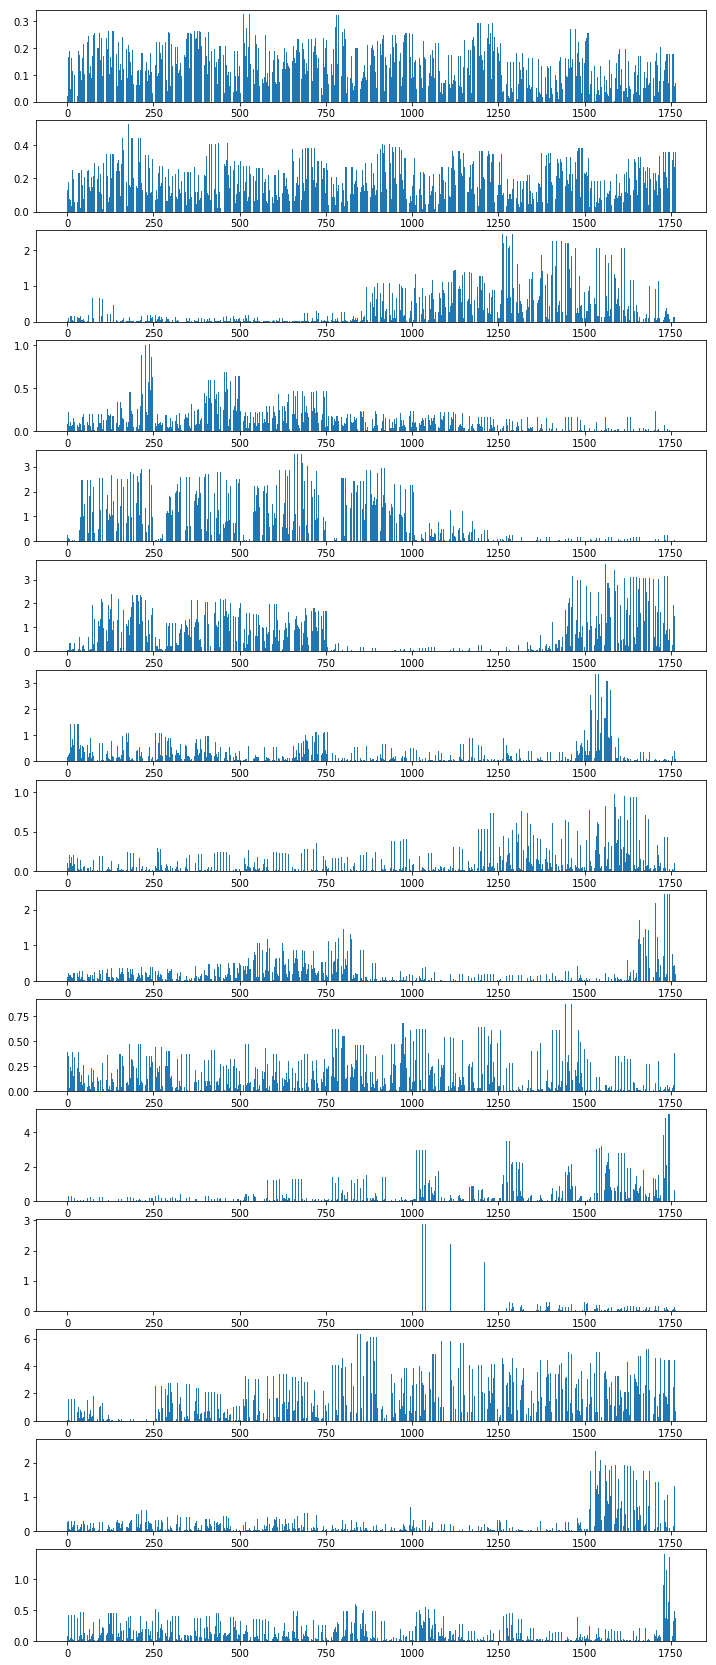

In [22]:
num_ims=len(sample_non_car_images)
plt.figure(figsize=(12,num_ims*2))
counter=0
for feature in hog_features :
    counter+=1
    plt.subplot(num_ims,1,counter)
    plt.bar(range(len(feature)),feature)

## Hog of Cr channel for Cars

In [24]:
hog_features=[]
hog_images=[]
for im in sample_car_images: 
    spatial_size=(32,32)
    im_HLS=convert_color(im,cspace='YCrCb')
    hog_f,hog_im = get_hog_features(im_HLS[:,:,1],vis=True, feature_vec=True)    
    hog_features.append(hog_f)
    hog_images.append(hog_im)

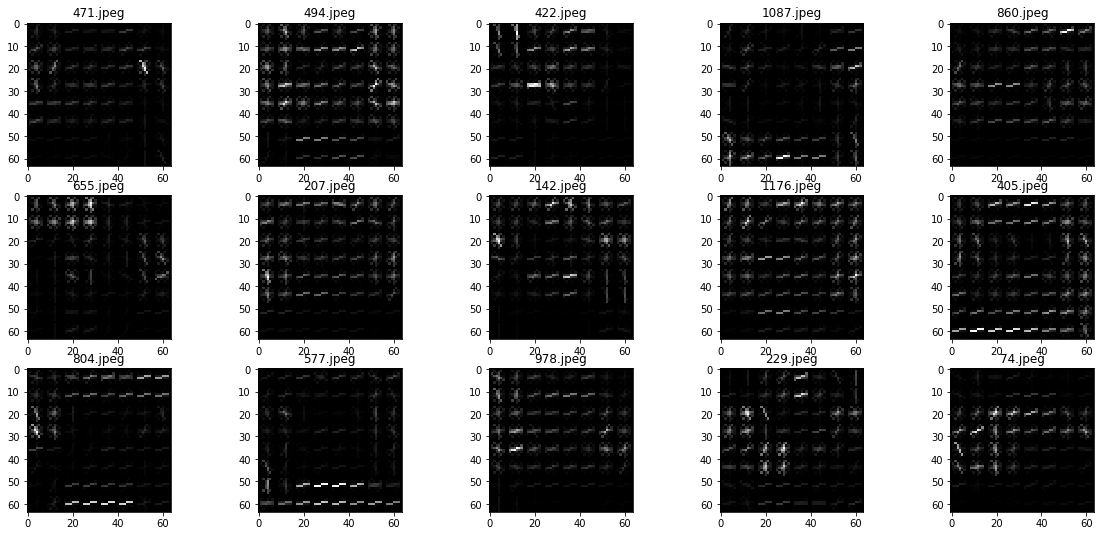

In [25]:
plot_multiple_images(hog_images,sample_car_files,gray=True,number_of_cols=5,w_factor=4,h_factor=3)

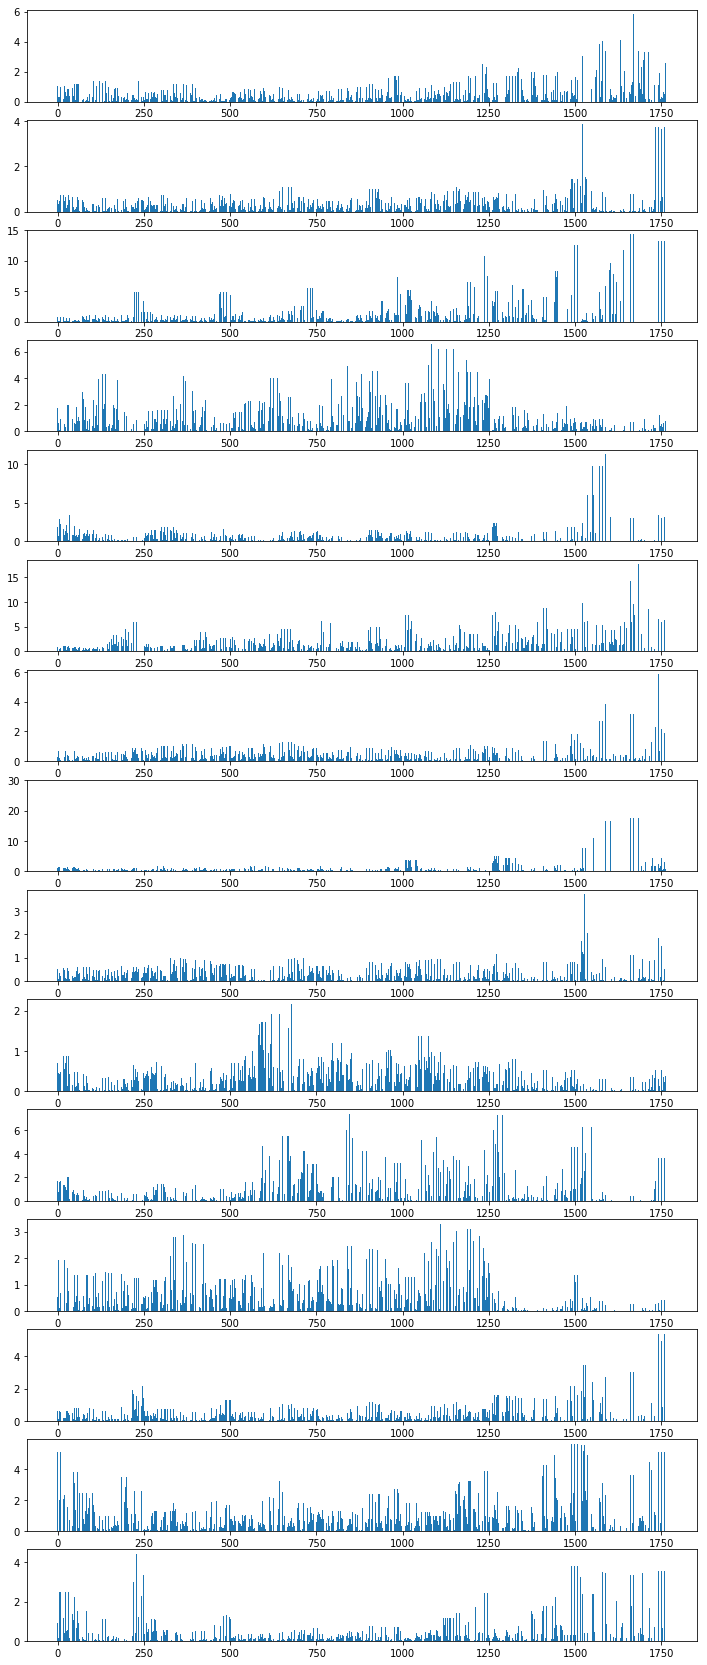

In [26]:
num_ims=len(sample_car_images)
plt.figure(figsize=(12,num_ims*2))
counter=0
for feature in hog_features :
    counter+=1
    plt.subplot(num_ims,1,counter)
    plt.bar(range(len(feature)),feature)

## Hog for Cr channel of non cars

In [28]:
hog_features=[]
hog_images=[]
for im in sample_non_car_images: 
    spatial_size=(32,32)
    im_HLS=convert_color(im,cspace='YCrCb')
    hog_f,hog_im = get_hog_features(im_HLS[:,:,1],vis=True, feature_vec=True)    
    hog_features.append(hog_f)
    hog_images.append(hog_im)

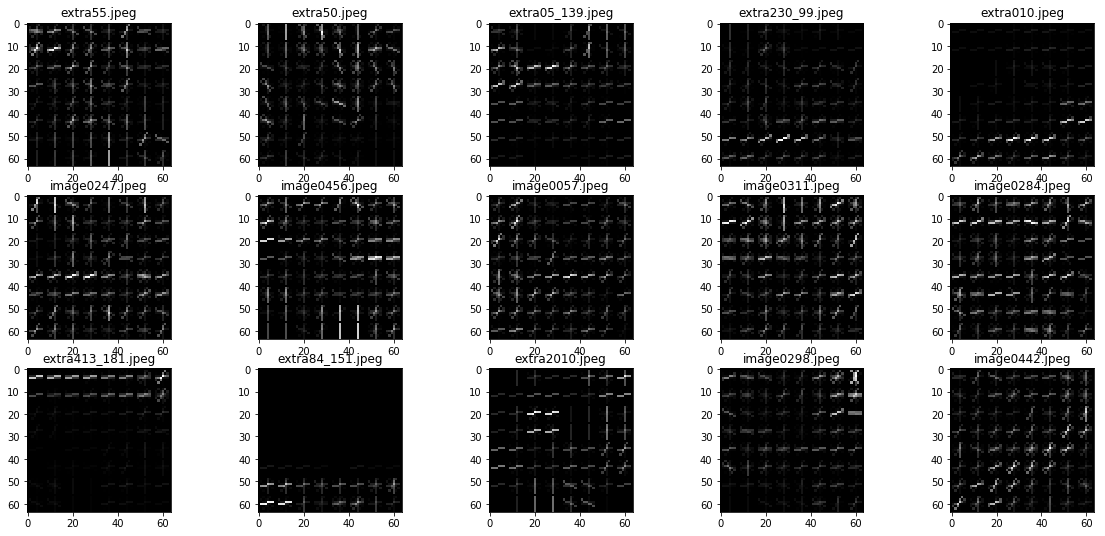

In [29]:
plot_multiple_images(hog_images,sample_non_car_files,gray=True,number_of_cols=5,w_factor=4,h_factor=3)

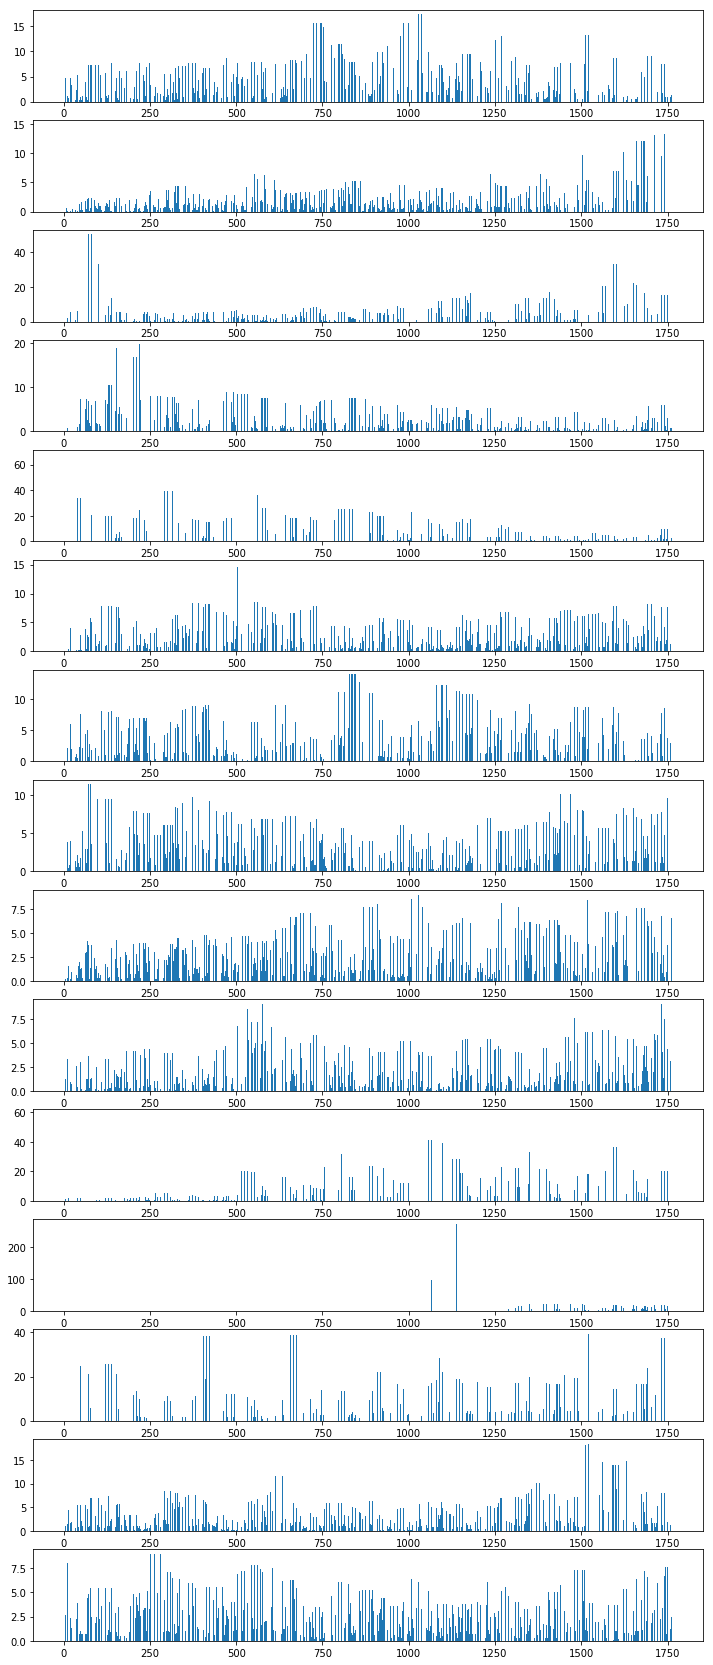

In [30]:
num_ims=len(sample_non_car_images)
plt.figure(figsize=(12,num_ims*2))
counter=0
for feature in hog_features :
    counter+=1
    plt.subplot(num_ims,1,counter)
    plt.bar(range(len(feature)),feature)

# Cb hog channel for car

In [31]:
hog_features=[]
hog_images=[]
for im in sample_car_images: 
    spatial_size=(32,32)
    im_HLS=convert_color(im,cspace='YCrCb')
    hog_f,hog_im = get_hog_features(im_HLS[:,:,2],vis=True, feature_vec=True)    
    hog_features.append(hog_f)
    hog_images.append(hog_im)

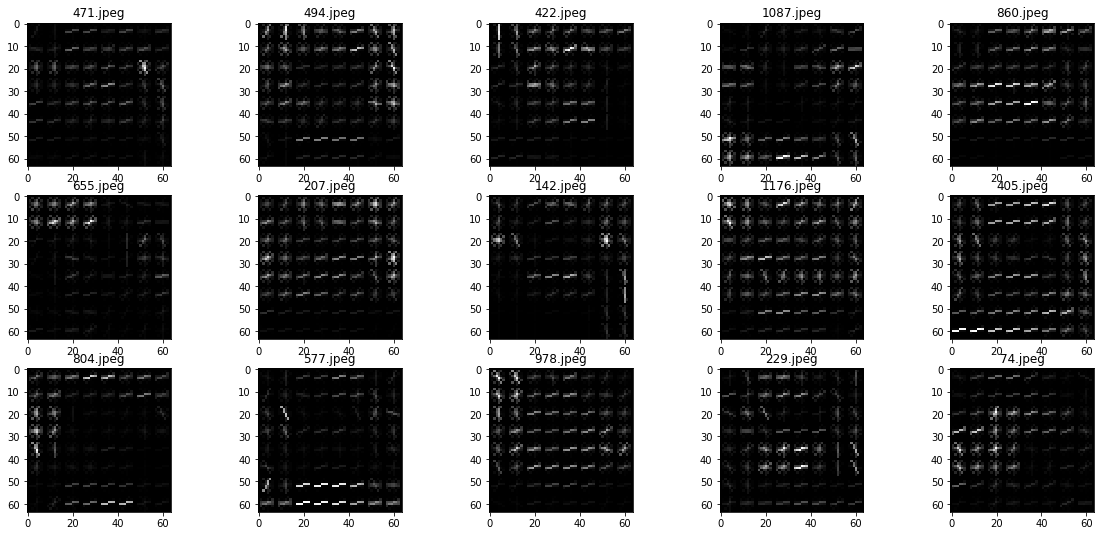

In [32]:
plot_multiple_images(hog_images,sample_car_files,gray=True,number_of_cols=5,w_factor=4,h_factor=3)

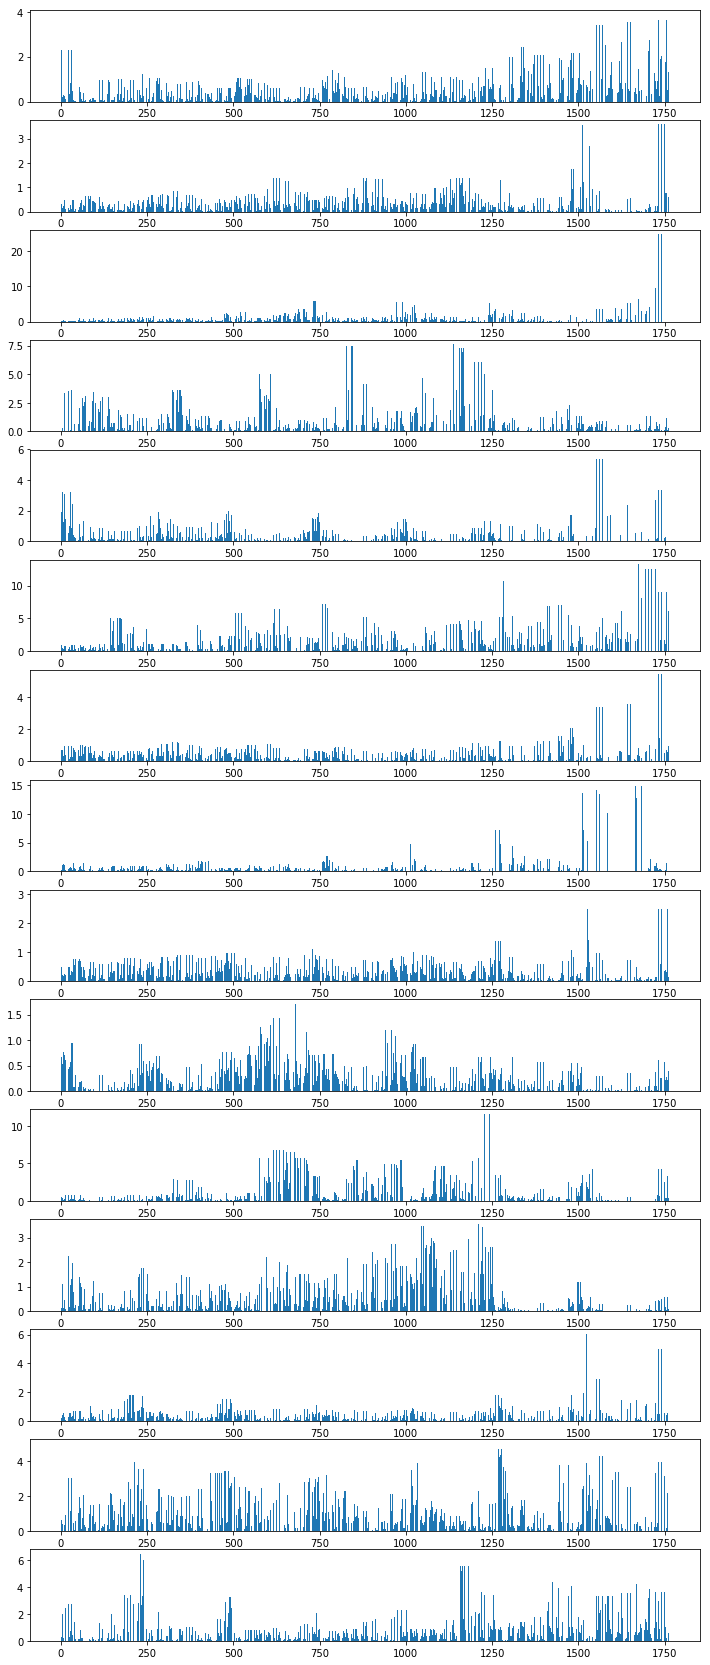

In [33]:
num_ims=len(sample_car_images)
plt.figure(figsize=(12,num_ims*2))
counter=0
for feature in hog_features :
    counter+=1
    plt.subplot(num_ims,1,counter)
    plt.bar(range(len(feature)),feature)

# Cb hog channel for no car

In [34]:
hog_features=[]
hog_images=[]
for im in sample_non_car_images: 
    spatial_size=(32,32)
    im_HLS=convert_color(im,cspace='YCrCb')
    hog_f,hog_im = get_hog_features(im_HLS[:,:,2],vis=True, feature_vec=True)    
    hog_features.append(hog_f)
    hog_images.append(hog_im)

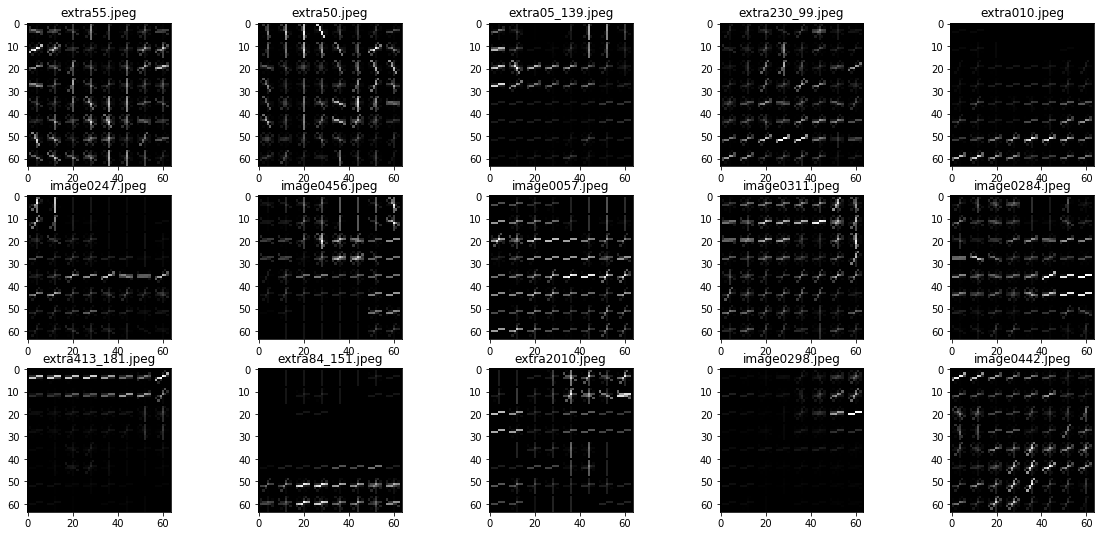

In [35]:
plot_multiple_images(hog_images,sample_non_car_files,gray=True,number_of_cols=5,w_factor=4,h_factor=3)

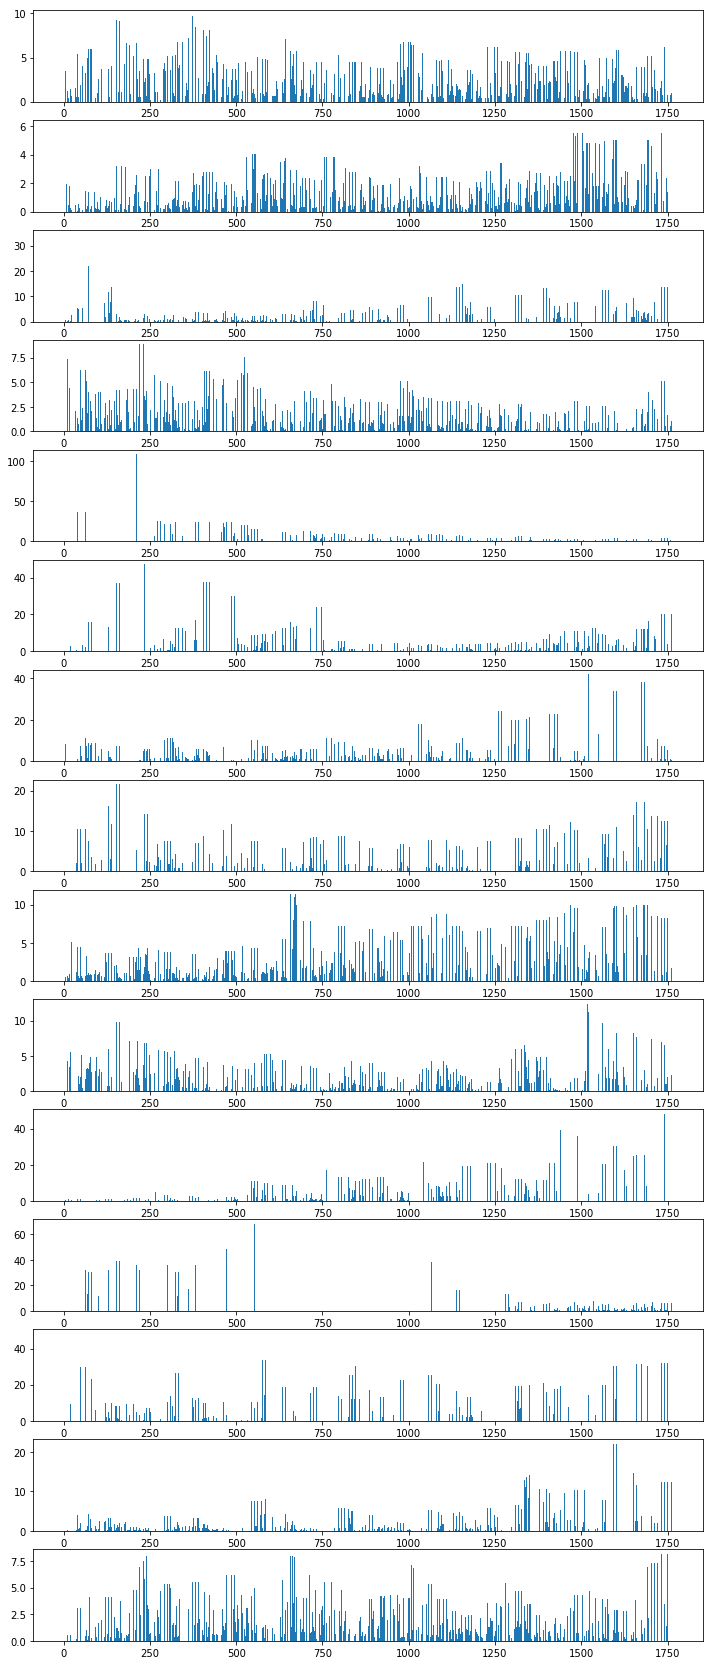

In [36]:
num_ims=len(sample_non_car_images)
plt.figure(figsize=(12,num_ims*2))
counter=0
for feature in hog_features :
    counter+=1
    plt.subplot(num_ims,1,counter)
    plt.bar(range(len(feature)),feature)